# The Explainer Notebook

<h1 align="center">20 Years of Change: Voting Trends in Copenhagen’s National Elections</h1>

<div align="center">

Jasmin Thari (s204155), Johanne Franck (s204088) & Smilla Due (s204153)

</div>


### Structure of this Notebook

This notebook consists of eight parts: [Motivation](#1), [Basic Statistics](#2), [Data Analysis](#3), [Genre](#4), [Visualizations](#5), [Discussion](#6), [Contributions](#7), and [References](#8).

In the first part, **Motivation**, we describe the project's goals and provide an overview of the dataset used.

In the second part, **Basic Statistics**, we give an overview of the dataset and its collection process. This section also includes a detailed explanation of the data cleaning procedures. Additionally, we present key dataset statistics and plots from our initial exploratory data analysis.

In the third part, **Data Analysis**, we conduct our analysis; where we describe and visualize the insights derived from the data.

In the fourth part, **Genre**, we explain the genre chosen for our data story and the specific tools used to tell our data story.

In the fifth part, **Visualizations**, we explain the visualizations choosen to support our data story. We explain the purpose of each visualization and how it contributes to the overall narrative.

In the sixth part, **Discussion**, we discuss our findings and the limitations of our analysis and data.

Finally, in the **Contributions** section, we detail the roles and responsibilities of each group member in the project.

> Disclaimer: Please note that in order to minimize the length of this notebook we have made plot functions and structured them in a seperate `plot_functions.py` file. We then call the functions to plot in this notebook. The file can be found on our [github](https://github.com/johannefranck/SocialData2025_FinalProject/tree/main).


### Table of Contents
1. [Motivation](#1)  
2. [Basic Statistics](#2)  
3. [Data Analysis](#3)  
4. [Genre](#4)  
5. [Visualizations](#5)  
6. [Discussion](#6)  
7. [Contributions](#7)  
8. [References](#8)

---


<a id="1"></a>
## 1.  Motivation

> 🎵 *Why does it matter? Why do we care?* \
> 🎵 *To see the past, the trends laid bare* \
> 🎵 *How has our capital city evolved?*\
> 🎵 *What values stayed, what problems solved?* 

### 1.1 Motivation and Goal

Smilla 

Skriv blandt andet hvorfor vi har valgt to decades


### 1.2 Data

The data used in this study was obtained from **Den Danske Valgdatabase** [1], powered by *Danmarks Statistik*. This comprehensive database contains election data from Denmark spanning back to 1979. It includes data from various types of elections, including National parliamentary elections (*folketingsvalg*).
<!-- 
- National parliamentary elections (*folketingsvalg*)  
- European Parliament elections (*europaparlamentsvalg*)  
- Referendums (*folkeafstemninger*)  
- Municipal and regional elections (*kommunalvalg* and *regionsrådsvalg*)  
- Parliamentary elections in Greenland and the Faroe Islands  -->

For this study, we focus on national elections within the **Copenhagen area (Københavns Storkreds)**, covering two decades and a total of six elections. This includes the elections held in the years:

<p align="center"><strong>2005 - 2007 - 2011 - 2015 - 2019 - 2022</strong></p>


The extracted election data includes:

- Total number of votes cast  
- Number of votes per political party across constituencies  

We filtered the dataset to include only constituencies within the Copenhagen area. These constituencies are:

* Indre Bykredsen
* Østerbrokredsen  
* Vesterbrokredsen  
* Nørrebrokredsen  
* Bispebjergkredsen  
* Brønshøjkredsen  
* Valbykredsen  
* Falkonerkredsen  
* Slotskredsen  
* Sundbyvesterkredsen  
* Sundbyøsterkredsen  
* Tårnbykredsen  

In addition to election data, **demographic and socioeconomic data** about the population of Copenhagen is also extracted. This data helps us understand voting patterns in the context of population characteristics. The additional data include:

- **Demographic**: Gender, age, ethnicity and education level
- **Socioeconomic**: Income support, income and living area size  

As Danmarks Statistik only conducts a new population inventory every five years, we will not have a new population inventory for each election. The most recent population inventory was conducted in 2024, and the previous inventories were conducted in 2019, 2014, 2009, and 2004. This means that the elections we are analyzing are connected to four different population inventories.

Danmarks Statistik match each election to the closest population inventory available at the time. This means:

- The 2005 and 2007 use the 2004 inventory
- The 2011 election use the 2009 inventory
- The 2015 election use the 2014 inventory
- The 2019 and 2022 elections use the 2019 inventory

As a result, the six elections in our study are connected to four different population inventories, which serve as the population reference points for our analysis.

In total, this resulted in **four `.csv` files**, which will be imported, cleaned, and explained in detail in the following sections. 

To map the geographical areas of Copenhagen, we needed to collect additional data, which we obtained from **Dataforsyningen** [2]. From there, we downloaded a `GeoJSON` file for each constituency in Copenhagen.

**Libaries**

The libraries used for this project are presented and imported below.

In [1]:
import os
import json

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
from bokeh.io import output_notebook

import folium
import branca.colormap as cm  
from branca.element import MacroElement, Template

from IPython.display import display, clear_output, HTML, IFrame

# Set the default plotly renderer
pio.renderers.default = 'iframe'

# Pandas settings
pd.set_option('future.no_silent_downcasting', True)

# Import our plotting functions
from plot_functions import *

In [2]:
theme_colors = ['#FDFAE1', '#241B5F', '#FFB400', '#4A4DE9', '#FF5A00', '#FF6273', '#FF95A1', '#F3DCC6'] 

expanded_theme_colors = ['#241B5F', '#6A66B2','#FFB400', '#FFE299','#4A4DE9', '#A7AAFF', '#FF5A00', '#FF9D5C', '#FF6273', '#FFAAB2', '#FF95A1', '#FFD4DA', '#F3DCC6', '#EBD2BB']

wing_colors = {'Left': '#d52729', 'Right': '#00739b'}

# Consistent ordering for the constituencies
const_order = ["Indre By", "Østerbro", "Vesterbro", "Nørrebro", "Bispebjerg", "Brønshøj", "Valby", "Falkoner", "Slots", "Sundbyvester", "Sundbyøster", "Tårnby"]

const_colors = {
  'Indre By':     '#241B5F',
  'Østerbro':     '#46237A',
  'Vesterbro':    '#4A4DE9',
  'Nørrebro':     '#ABD2FA',
  'Bispebjerg':   '#FFB400',
  'Brønshøj':      '#FFC800',
  'Valby':        '#FFE5B4',
  'Falkoner':     '#FF5A00',
  'Slots':         '#FF8427',
  'Sundbyvester': '#D64161',
  'Sundbyøster':  '#FF6273',
  'Tårnby':       '#FF95A1', 
  'Copenhagen (Avg.)':   '#696969'}

party_colors = {
    'A.Socialdemokratiet'                        : '#c9002c',  
    'V.Venstre,DanmarksLiberaleParti'            : '#0066a1', 
    'B.DetRadikaleVenstre'                       : '#EC008C',  
    'Ø.Enhedslisten-DeRød-Grønne'                : '#159F6B',  
    'F.SF-SocialistiskFolkeparti'                : '#C52E26',  
    'C.DetKonservativeFolkeparti'                : '#00583C',  
    'O.DanskFolkeparti'                          : '#F6D40D',  
    'D.Centrum-Demokraterne'                     : '#812A7C',  
    'E.KlausRiskærPedersen'                      : '#F6D40D',  
    'I.LiberalAlliance'                          : '#0C2840',  
    'K.Kristendemokraterne'                      : '#646EAD',  
    'M.Minoritetspartiet'                        : '#F6D40D',  
    'Q.FrieGrønne,DanmarksNyeVenstrefløjsparti'  : '#E6F24B',  
    'Å.Alternativet'                             : '#77F24B', 
    'Æ.Danmarksdemokraterne-IngerStøjberg'       : '#143C75',  
    'D.NyeBorgerlige'                            : '#214E58',  
    'M.Moderaterne'                              : '#7A2E8E'}

<a id="2"></a>
## 2.  Basic Statistics

This section is divided into two parts: **2.1 Data Cleaning** and **2.2 Explorative Analysis**. In the first part, we load the data, clean it, and provide explanations of the cleaning process. In the second part, we present some basic statistics and visualizations of the data.

### 2.1 Data Cleaning

In this section, we load and clean the data. Overall, we work with three different datasets:

1. **Geographical data**: Contains geographic information at the constituency level. We use this dataset to filter the other datasets so that only constituencies within the Copenhagen area are included. 

2. **Election data**: Contains the number of votes received by each political party in each constituency, for each election year.

3. **Sociodemographic data**: Contains information about the population at the constituency level. This data is used to analyze voting patterns in relation to various population characteristics. To make the analysis more manageable, we divide this dataset into the following subsets:
   - **Demographic data**: Includes information such as *gender*, *age*, and *citizenship*.
   - **Origin**: Includes data on *immigrants and descendants*. 
   - **Education data**: Covers *educational level*.
   - **Income support**: Includes data on *income support* level.
   - **Income data**: Contains information on *income* per household.
   - **Housing size**: Contains data on *the size of house*.

Both the election data and population data are initially in **wide format**, meaning each row represents a constituency and each column represents a variable. We convert the datasets into **long format** using the `melt` function. In long format, each row represents a single observation (e.g., a specific value for a variable in a constituency and year), making it easier to filter, group, and analyze the data.

##### 2.1.1 Geographical data
The first dataset we will import is the **geographical data**. This dataset contains information about the geographical areas in Copenhagen, including the names of the constituencies and their corresponding constituency label (danish "Kredsnr."). This dataset is essential for linking the election data and population data to the geographical areas in Copenhagen.

The first step is to filter the dataset to only include the constituencies in the Copenhagen constituency. 

Next, we create a mapping between the constituency names and their corresponding constituency label. This mapping will be used throughout the notebook. 

In [3]:
# Load the data
df_geo = pd.read_csv('Data/raw/Geografi.csv', sep=';', decimal=',', na_values='-')
df_geo.columns = df_geo.columns.str.replace(' ', '', regex=True)

# Filter the data to only keep Copenhagen Constituencies 
df_geo_cph = df_geo.query("Storkredsnavn=='Københavns Storkreds'").drop_duplicates()
df_geo_cph['KredsNr'] = df_geo_cph['KredsNr'].astype(int)

# Keep only the necessary columns
df_geo_cph = df_geo_cph[['KredsNr', 'Kredsnavn','KommuneNr','Kommunenavn']]

# Replace Utterslev with Bispebjerg
df_geo_cph['Kredsnavn'] = df_geo_cph['Kredsnavn'].replace({'6. Utterslev':'6. Bispebjerg'})

# Drop duplicates
df_geo_cph = df_geo_cph.drop_duplicates(subset=['KredsNr', 'Kredsnavn','KommuneNr','Kommunenavn'])

print("Geography data shape:", df_geo_cph.shape)

Geography data shape: (13, 4)


In [4]:
# Split the 'Kredsnavn' column into two parts: ID and Name
constituency_split = df_geo_cph['Kredsnavn'].drop_duplicates().str.split('.', n=1, expand=True)
constituency_split.columns = ['ConstituencyID', 'ConstituencyName']

# Convert ID column to integers and strip whitespace from the names
constituency_split['ConstituencyID'] = constituency_split['ConstituencyID'].astype(int)
constituency_split['ConstituencyName'] = constituency_split['ConstituencyName'].str.strip()

# Create a mapping from ID to Name
constituency_id_to_name = dict(zip(constituency_split['ConstituencyID'], constituency_split['ConstituencyName']))
# Add the extra key
constituency_id_to_name[0] = "Copenhagen (Avg.)"
# Create a reverse mapping from Name to ID
constituency_name_to_id = {name: id_ for id_, name in constituency_id_to_name.items()}

##### 2.1.2 Election data
The second dataset we will import is the **election data**. This dataset is structured in wide format, where each row correspond to a constituency and each column corresponds to a political party per year, resulting in 172 columns. As this is a very inconvenient format, we will reshape the dataset to long format. 

First, we will filter the data to only include the constituencies in the Copenhagen constituency using the defined map. Next, we will reshape the dataset to long format, where each row corresponds to a constituency-year-party combination.

In [5]:
# Load the election data
df_election = pd.read_csv('Data/raw/Valgdata.csv', sep=';' , decimal=',', na_values='-')
df_election.columns = df_election.columns.str.replace(' ', '', regex=True)

# Filter the election data to only keep the relevant constituencies
df_elec_cph = df_election[df_election['KredsNr'].isin([str(k) for k in constituency_id_to_name.keys()])]
df_elec_cph.loc[:, 'KredsNr'] = df_elec_cph['KredsNr'].astype(int)

print("Election data shape:", df_elec_cph.shape)

Election data shape: (12, 172)


In [6]:
# Select vote cols (start with "FV")
vote_columns = [col for col in df_elec_cph.columns if col.startswith("FV")]

# Melt the dataframe to long format
df_elec_cph_long = df_elec_cph.melt(
    id_vars=['KredsNr'],
    value_vars=vote_columns,
    var_name='YearParty',
    value_name='Votes')

# Split the 'YearParty' column into 'Year' and 'Party'
df_elec_cph_long[['Year', 'Partyname']] = df_elec_cph_long['YearParty'].str.extract(r'FV(\d{4})-(.+)')

# Drop columns and reorder
df_elec_cph_long = df_elec_cph_long.drop(columns='YearParty')
df_elec_cph_long = df_elec_cph_long[['KredsNr', 'Year', 'Partyname', 'Votes']]

# Replace NaN values in Votes with 0
df_elec_cph_long['Votes'] = df_elec_cph_long['Votes'].fillna(0)

# Convert 'Year' and KredsNr to integer
df_elec_cph_long['Year'] = df_elec_cph_long['Year'].astype(int)
df_elec_cph_long['KredsNr'] = df_elec_cph_long['KredsNr'].astype(int)

print("Election data long format shape:", df_elec_cph_long.shape)

Election data long format shape: (2016, 4)


In the column `party_name`, we have the all parties represented in the elections - besides that we also have the total number of votes cast, blank votes, the number of invalid votes and eligible voters. However, for our analysis, we are interested in the political parties, and we also want to divide the votes into *left* and *right* wing. Therefore, we will create a new column `Wing` that indicates whether the party part of the left- or right-wing bloc.

Most Danish parties have clear ideological leanings and are easy to group, while some define themselves as centrist and are more difficult to place. For instance, Centrum Demokraterne (CD), a centrist party that broke away from Socialdemokratiet in 1973 is more difficult to place. While they collaborated with both political blocs during their time in Parliament, we’ve chosen to place them in the right-wing category. This decision reflects their ideological origins and the general rightward tilt of their policies (*Source: [danmarkshistorien.dk](https://danmarkshistorien.lex.dk/Centrum-Demokraterne_1973-2008)*). Another tricky case is Moderaterne (M), a relatively new party founded in 2021 by former Prime Minister Lars Løkke Rasmussen. Although their first time in government (in 2022) involved a centrist coalition, we’ve chosen to classify them as right-leaning, based on their political stance and liberal-centrist identity, which places them closer to the center-right in Denmark’s political spectrum (*Source: [moderaterne.dk](https://moderaterne.dk/moderaterne-mener/)*).

In [7]:
party_code_mapping = {
    (2019, 'D.Centrum-Demokraterne'): 'D.NyeBorgerlige', # error in the data
    (2022, 'D.Centrum-Demokraterne'): 'D.NyeBorgerlige', # error in the data
    (2022, 'M.Minoritetspartiet'): 'M.Moderaterne', # error in the data
    (2007, 'Y.NyAlliance'): 'I.LiberalAlliance'} # same party, different name

parties = ['A.Socialdemokratiet','B.DetRadikaleVenstre', 'C.DetKonservativeFolkeparti','D.Centrum-Demokraterne', 'D.NyeBorgerlige', 'E.KlausRiskærPedersen',
           'F.SF-SocialistiskFolkeparti','I.LiberalAlliance', 'K.Kristendemokraterne', 'M.Minoritetspartiet', 'M.Moderaterne', 'O.DanskFolkeparti', 'P.StramKurs', 
           'Q.FrieGrønne,DanmarksNyeVenstrefløjsparti', 'V.Venstre,DanmarksLiberaleParti', 'Y.NyAlliance',
           'Æ.Danmarksdemokraterne-IngerStøjberg','Ø.Enhedslisten-DeRød-Grønne','Å.Alternativet']

wing = {
    "Left": ['A.Socialdemokratiet',
             'F.SF-SocialistiskFolkeparti',
             'Ø.Enhedslisten-DeRød-Grønne',
             'Q.FrieGrønne,DanmarksNyeVenstrefløjsparti',
             'Å.Alternativet',
             'B.DetRadikaleVenstre',
             'M.Minoritetspartiet'],
    "Right": ['C.DetKonservativeFolkeparti',
              'V.Venstre,DanmarksLiberaleParti',
              'I.LiberalAlliance',
              'O.DanskFolkeparti',
              'Æ.Danmarksdemokraterne-IngerStøjberg',
              'P.StramKurs',
              'D.Centrum-Demokraterne',
              'K.Kristendemokraterne',
              'Y.NyAlliance',
              'E.KlausRiskærPedersen', 
              'D.NyeBorgerlige',
              'M.Moderaterne']}

In [8]:
def map_party(row):
    return party_code_mapping.get((row['Year'], row['Partyname']), row['Partyname'])

df_elec_cph_long['Partyname'] = df_elec_cph_long.apply(map_party, axis=1)

df_elec_cph_long['Wing'] = df_elec_cph_long['Partyname'].apply(
    lambda x: 'Left' if x in wing['Left'] else ('Right' if x in wing['Right'] else ''))

##### 2.1.3 Sociodemographic Data
The third dataset we will import is the **sociodemographic data**. This dataset contains information about the population in Denmark. The first step is to filter the dataset to only include the constituencies in the Copenhagen constituency using the defined map. 

As the data is structured in wide format with 11374 columns, we will split the data into sub dataframe and into long format, each corresponding to a specific characteristic. 


* For demographic data all years [2004,2009,2014,2019].
* For Socioeconomic data, not all data is available from **Den Danske Valgbase**.
    * For income support: the available data is [2009,2014,2019]
    * For income: the available data is [2009,2014,2019]
    * For living area size: the available data is [2007,2009,2014,2019]

In [9]:
# Load the population data
df_population = pd.read_csv("Data/raw/Befolkning.csv", sep=';', low_memory=False, decimal=',', na_values='-')
df_population.columns = df_population.columns.str.replace(' ', '', regex=True)

# Filter the population data to only keep the relevant constituencies
df_population_cph = df_population[df_population['KredsNr'].isin([str(k) for k in constituency_id_to_name.keys()])]
df_population_cph.loc[:, 'KredsNr'] = df_population_cph['KredsNr'].astype(int)

print(f"Population data shape: {df_population_cph.shape}")

Population data shape: (12, 11374)


The dataset contains several columns that consist entirely of `NaN` values. These columns will therefore be dropped.

In addition, some rows contain missing values. Upon inspection, these `NaN` entries appear to correspond to cases where the count is effectively zero—indicating that no individuals in that particular category were present in the given constituency. 

For example, a column like  
`FV2015-Antalpersoneropgjortefterstatsborgerskabkønogaldersgrupper_Kvinder10-14år_09.Nordamerika`  
represents the number of girls aged 10–14 with North American citizenship in a specific constituency in 2015. If the value is missing (`NaN`), here we take it to mean that no such individuals were registered in the data. In such cases, we will treat `NaN` as `0`.



In [10]:
# Drop columns with all NaN values
df_population_cph = df_population_cph.dropna(axis=1, how='all')
print(f"Population data shape after dropping empty columns: {df_population_cph.shape}")

Population data shape after dropping empty columns: (12, 5824)


In [11]:
# Replace NaN values with 0 & convert to numeric
df_population_cph.fillna(0, inplace=True) 
df_population_cph = df_population_cph.apply(pd.to_numeric, errors='coerce')

Since the population data extracted from Danmarks Statistik is aggregated by election year, we map the `year` column to refer to the year of the population inventory. Here, we define the mapping as follows:

In [12]:
year_replacements = {
    '2007': '2004',
    '2011': '2009',
    '2015': '2014',
    '2019': '2019'}

After cleaning the data we divide this huge dataframe into sub-dataframes as defined previously.

**Demographics**

Includes age, gender and citizenship.

In [13]:
# Extract the demographic columns
demographics_cols = [
    col for col in df_population_cph.columns
    if col.startswith("FV") and "Antalpersoneropgjortefter" in col]

# Melt the DataFrame
df_demo_long = df_population_cph.melt(
    id_vars=['Gruppe', 'KredsNr'],
    value_vars=demographics_cols,
    var_name='RawColumn',
    value_name='Count')

# Extract the fields using regex: FV<year>-Antalpersoner..._<Gender><Age>_<CitizenshipCode>.<CitizenshipName>
df_demo_long[['Year', 'GenderAge', 'Citizenship']] = df_demo_long['RawColumn'].str.extract(
    r'FV(\d{4})-Antalpersoner.*?_(\w+\d+-?\d*år)_(?:\d+\.)?(.+)$')

# Separate Gender and Age
df_demo_long[['Gender', 'Age']] = df_demo_long['GenderAge'].str.extract(r'(\D+)(\d+-?\d*år)')

# Reorder and clean
df_demo_long = df_demo_long.drop(columns=['RawColumn', 'GenderAge'])
df_demo_long = df_demo_long[['Gruppe', 'KredsNr', 'Year', 'Gender', 'Age', 'Citizenship', 'Count']]

# remove år from Age
df_demo_long['Age'] = df_demo_long['Age'].str.replace('år', '', regex=False)

df_demo_long = df_demo_long[df_demo_long['Year'].isin(year_replacements.keys())].replace({'Year': year_replacements})

print(f"Population demographics data shape: {df_demo_long.shape}")

Population demographics data shape: (18432, 7)


**Origin**

Includes first and second generation immigrants and their origin.

In [14]:
# Filter relevant columns
origin_cols = [
    col for col in df_population_cph.columns
    if "Indvandrereogefterkommerefordeltefteroprindelsesland" in col]

# Melt to long format
df_origin_long = df_population_cph.melt(
    id_vars=['Gruppe', 'KredsNr'],
    value_vars=origin_cols,
    var_name='RawColumn',
    value_name='Count')

# Extract year, gender, age, origin
df_origin_long[['Year', 'GenderAge', 'Origin']] = df_origin_long['RawColumn'].str.extract(
    r'FV(\d{4})-Indvandrereogefterkommerefordeltefteroprindelsesland_(\D+\d+-?\d*år)_(?:\d+\.)?(.+)$')

# Split gender and age
df_origin_long[['Gender', 'Age']] = df_origin_long['GenderAge'].str.extract(r'(\D+)(\d+-?\d*år)')

# Clean up
df_origin_long = df_origin_long.drop(columns=['RawColumn', 'GenderAge'])
df_origin_long['Age'] = df_origin_long['Age'].str.replace('år', '', regex=False)

# Map year replacements
df_origin_long = df_origin_long[df_origin_long['Year'].isin(year_replacements.keys())].replace({'Year': year_replacements})

# Apply the origin mapping
origin_mapping = {
    'Danmark': 'Denmark',
    'Nordiskelande': 'Nordic countries',
    'Tyrkiet': 'Turkey',
    'TidligereJugoslavien': 'Former Yugoslavia',
    'GamleEU-lande': 'Old EU countries',
    'ØvrigegamleEU-lande': 'Old EU countries', 
    'NyeEU-lande': 'New EU countries',
    'ØvrigeEuropa': 'Other European countries',
    'Afrika': 'Africa',
    'Nordamerika': 'North America',
    'Syd-ogMellemamerika': 'South and Central America',
    'Syd-ogMellemam.': 'South and Central America',
    'AsienogOceanien': 'Asia and Oceania',
    'Asienogoceanien': 'Asia and Oceania',
    'Uoplyst': 'Unspecified/Stateless',
    'Uoplyst/statsløse': 'Unspecified/Stateless',
}
df_origin_long['Origin'] = df_origin_long['Origin'].replace(origin_mapping)

print(f"Population origin data shape: {df_origin_long.shape}")

Population origin data shape: (16872, 7)


**Education**

Includes the highest achieved educational level by age group.

In [15]:
# Extract the education columns
educ_columns = [
    col for col in df_population_cph.columns
    if col.startswith("FV") and "Højstfuldførteerhvervsuddannelseogaldersgrupper" in col]

# Melt the DataFrame
df_educ_long = df_population_cph.melt(
    id_vars=['Gruppe', 'KredsNr'],
    value_vars=educ_columns,
    var_name='RawColumn',
    value_name='Count')

# Extract the fields using regex: FV<year>-Højstfuldførteer..._<Age>_<EducationLevel>
df_educ_long[['Year', 'Age', 'EducationLevel']] = df_educ_long['RawColumn'].str.extract(
    r'FV(\d{4})-Højstfuldførteerhvervsuddannelseogaldersgrupper_(\d{1,3}-?\d*år)(?:_(?:\d+\.)?(.+))?$')

# Remove 'år' from age
df_educ_long['Age'] = df_educ_long['Age'].str.replace('år', '', regex=False)

# Reorder and clean
df_educ_long = df_educ_long.drop(columns=['RawColumn'])
df_educ_long = df_educ_long[['Gruppe', 'KredsNr', 'Year', 'Age', 'EducationLevel', 'Count']]

# Map year replacements
df_educ_long = df_educ_long[df_educ_long['Year'].isin(year_replacements.keys())].replace({'Year': year_replacements})

# Drop NaN values
df_educ_long = df_educ_long.dropna(subset=['Year', 'Age', 'EducationLevel'])

# Map the education levels to English
education_mapping = {
    'Grundskole': 'Primary School',
    'Almengymnasial': 'General Upper Secondary',
    'Erhvervsgymnaisal': 'Vocational Education',
    'Erhvervsfaglig': 'Vocational Education',
    'Kortvideregående': 'Short-cycle Higher Education',
    'Mellemlangvideregående': "Bachelor's Degree",
    'Langvideregående': "Master's Degree",
    'Uoplyst': 'Unspecified'
}
df_educ_long['EducationLevel'] = df_educ_long['EducationLevel'].map(education_mapping)

print(f"Education data shape: {df_educ_long.shape}")

Education data shape: (4416, 6)


**Income support**

Includes the income support type - if any - per residents received by the Danish Government. If a resident does not receive any income support the resident is noted in the date as 'No Received Benefits'.

In [16]:
# Extract the support columns
support_cols = [
    col for col in df_population_cph.columns
    if col.startswith("FV") and "Personerefterforsørgelsestype" in col]

# Melt the DataFrame
df_support_long = df_population_cph.melt(
    id_vars=['Gruppe', 'KredsNr'],
    value_vars=support_cols,
    var_name='RawColumn',
    value_name='Count')

# Extract Year and SupportType
df_support_long[['Year', 'SupportType']] = df_support_long['RawColumn'].str.extract(
    r'FV(\d{4})-Personerefterforsørgelsestype_\d+\.(.+)')

# Clean up
df_support_long = df_support_long.drop(columns='RawColumn')
df_support_long = df_support_long[['Gruppe', 'KredsNr', 'Year', 'SupportType', 'Count']]

# Map year replacements
df_support_long = df_support_long[df_support_long['Year'].isin(year_replacements.keys())].replace({'Year': year_replacements})

# Map the support types to English
support_mapping = {
    'Arbejdsløshedsdagpenge': 'Unemployment Benefits',
    'LedighedsydelseogFleksjob': 'Unemployment Benefits',
    'Aktivering': 'Activation Programs',
    'Sygedagpenge': 'Health / Disability Support',
    'Kontanthjælp': 'Social Assistance (Cash Benefits)',
    'Revalidering': 'Health / Disability Support',
    'Barselsdagpenge': 'Parental Leave Benefits',
    'Førtidspension': 'Disability Pension',
    'Efterløn': 'Early Retirement Pension',
    'Folkepension': 'State Pension',
    'Modtagerikkeydelser': 'No Received Benefits',
    'Antalpersonerialt': 'Total Number of Persons'}
df_support_long['SupportType'] = df_support_long['SupportType'].map(support_mapping)

print(f"Support data shape: {df_support_long.shape}")

Support data shape: (432, 5)


We use **Dansk Statistik** [3]  as a reference for mapping the income support time in reasonable categories.

**Income**

Includes the income in Danish kr. per household. It is not stated in the data the corresponding number of residents in a household and how many are in the workforce.

In [17]:
# Filter relevant income columns
income_cols = [
    col for col in df_population_cph.columns
    if col.startswith("FV") and "Husstandsindkomsterfordeltpåafstemningsområder" in col]

# Melt
df_income_long = df_population_cph.melt(
    id_vars=['Gruppe', 'KredsNr'],
    value_vars=income_cols,
    var_name='RawColumn',
    value_name='Value')

# Extract Year + IncomeMetric
df_income_long[['Year', 'IncomeMetric']] = df_income_long['RawColumn'].str.extract(
    r'FV(\d{4})-Husstandsindkomsterfordeltpåafstemningsområder_(.+)')

# Clean up
df_income_long = df_income_long.drop(columns='RawColumn')
df_income_long = df_income_long[['Gruppe', 'KredsNr', 'Year', 'IncomeMetric', 'Value']]

# Map year replacements
df_income_long = df_income_long[df_income_long['Year'].isin(year_replacements.keys())].replace({'Year': year_replacements})

# Define income brackets to keep
income_brackets = [
    'Under100.000kr.',
    '100.000-149.999kr',
    '150.000-199.999kr.',
    '200.000-299.999kr.',
    '300.000-399.999kr.',
    '400.000-499.999kr.',
    '500.000-749.999kr.',
    '750.000kr.-']

print(f"Income data shape: {df_income_long.shape}")

Income data shape: (612, 5)


Our data shows around 350.000 households in the Copenhagen area. We check that this number of households is plausible and that we are not missing any data by comparing to the national average of people in a household:

5.998.205 / 1.857.302 = 3.2295 persons pr household (march 2025) (reference: [4, 5])

An urban area [6] like Copenhagen is likely to have smaller average household size than the national average.

**Living area size**

Includes the living space area size per household.

In [18]:
housing_size_columns = [
    col for col in df_population_cph.columns
    if col.startswith("FV") and "boligstørrelse" in col]

# Melt to long format
df_house_size_long = df_population_cph.melt(
    id_vars=['Gruppe', 'KredsNr'],
    value_vars=housing_size_columns,
    var_name='RawColumn',
    value_name='Count')

# Extract year, aggregate level, and size category
df_house_size_long[['Year', 'AggregateLevel', 'HouseSize']] = df_house_size_long['RawColumn'].str.extract(
    r'FV(\d{4})-Boligerogpersonerefterboligstørrelse_\d+\.(?:Antal)?(boliger|personer)_(.+)')

df_house_size_long['AggregateLevel'] = df_house_size_long['AggregateLevel'].map({'boliger': 'Units', 'personer': 'Residents'})

# Reorder columns
df_house_size_long = df_house_size_long[['Gruppe', 'KredsNr', 'Year', 'AggregateLevel', 'HouseSize', 'Count']]

# Drop columns with NaN values
df_house_size_long = df_house_size_long.dropna(subset=['Year', 'AggregateLevel', 'HouseSize'])

# Map year replacements
df_house_size_long = df_house_size_long[df_house_size_long['Year'].isin(year_replacements.keys())].replace({'Year': year_replacements})

print(f"House size data shape: {df_house_size_long.shape}")

House size data shape: (624, 6)


##### 2.2 Explorative Analysis

**Election Data**

We begin by examining the election data, focusing on two key metrics: voter turnout and the vote share of left- and right-wing blocs across the last six election years in Copenhagen.

In [19]:
# Total number of people who actually voted, per year
df_voter_turnout = df_elec_cph_long.query("Partyname == 'Afgivnestemmer'").groupby(['Year']).agg(TotalVotesCast=('Votes', 'sum')).reset_index()

# Total number of people who were eligible to vote, per year
df_voter_eligibility = df_elec_cph_long.query("Partyname == 'Stemmeberettigede'").groupby(['Year']).agg(TotalEligibleVoters=('Votes', 'sum')).reset_index()

# Voter turnout ratio = votes cast / eligible voters
df_turnout_ratio = pd.DataFrame(df_voter_turnout['Year'].copy())
df_turnout_ratio['Ratio'] = df_voter_turnout['TotalVotesCast'] / df_voter_eligibility['TotalEligibleVoters']

In [20]:
plot_bar_dist_perc(values = df_turnout_ratio['Year'].values, 
              percentage = df_turnout_ratio['Ratio'].values * 100, 
              color = theme_colors[2],
              y_axis_title = "Voter Turnout (%)",
              title = "Voter Turnout Percentage in Copenhagen Constituencies (2005-2022)",              
              html = 'html_plots/vote_turnout.html')

For voter turnout, we observe that participation has remained relatively stable over the years, with a slight increase in 2007 and 2011. In the last three elections, the overall turnout has hovered around 84%.

Next, we examine the vote share of the left- and right-wing blocs in Copenhagen across the last six elections.

In [21]:
# Filter the data to only include the parties
df_elec_cph_parties = df_elec_cph_long[df_elec_cph_long['Partyname'].isin(parties)].reset_index(drop=True)

# Get total voters per year
df_total_voters = df_elec_cph_parties.groupby('Year')['Votes'].sum().reset_index()
df_total_voters = df_total_voters.rename(columns={'Votes': 'TotalVotes'})

# Get vote sum per wing per year
df_wing_sum = df_elec_cph_parties.groupby(['Year', 'Wing'])['Votes'].sum().reset_index()

# Merge and compute ratio
df_wing_ratio = pd.merge(df_wing_sum, df_total_voters, on='Year')
df_wing_ratio['WingRatio'] = df_wing_ratio['Votes'] / df_wing_ratio['TotalVotes']

In [22]:
plot_stacked_bar_dist(
    years=df_wing_ratio['Year'],
    counts=df_wing_ratio['Wing'],
    legend='Wing',
    values=df_wing_ratio['Votes'],
    html="html_plots/wing_share_votes.html",
    color_map=wing_colors,
    show_percentage=True,
    y_axis_title="Vote Share (%)",
    title="Vote Share by Wing (2005–2022) in Copenhagen Constituencies"
)

We observe a clear trend: the left-wing bloc has consistently received a higher share of votes compared to the right-wing bloc in Copenhagen. This trend strengthened over the years, peaking at 71.6% in 2019 before declining to 65% in 2022. The slight drop in 2022 can be attributed, in part, to the growing appeal of forming a centrist government during that election [7]. 

**Demographics**

In this section, we take a closer look at the demographic data, visualizing the population distribution by gender and age group across the last four population inventories to examine how the population has changed over time.

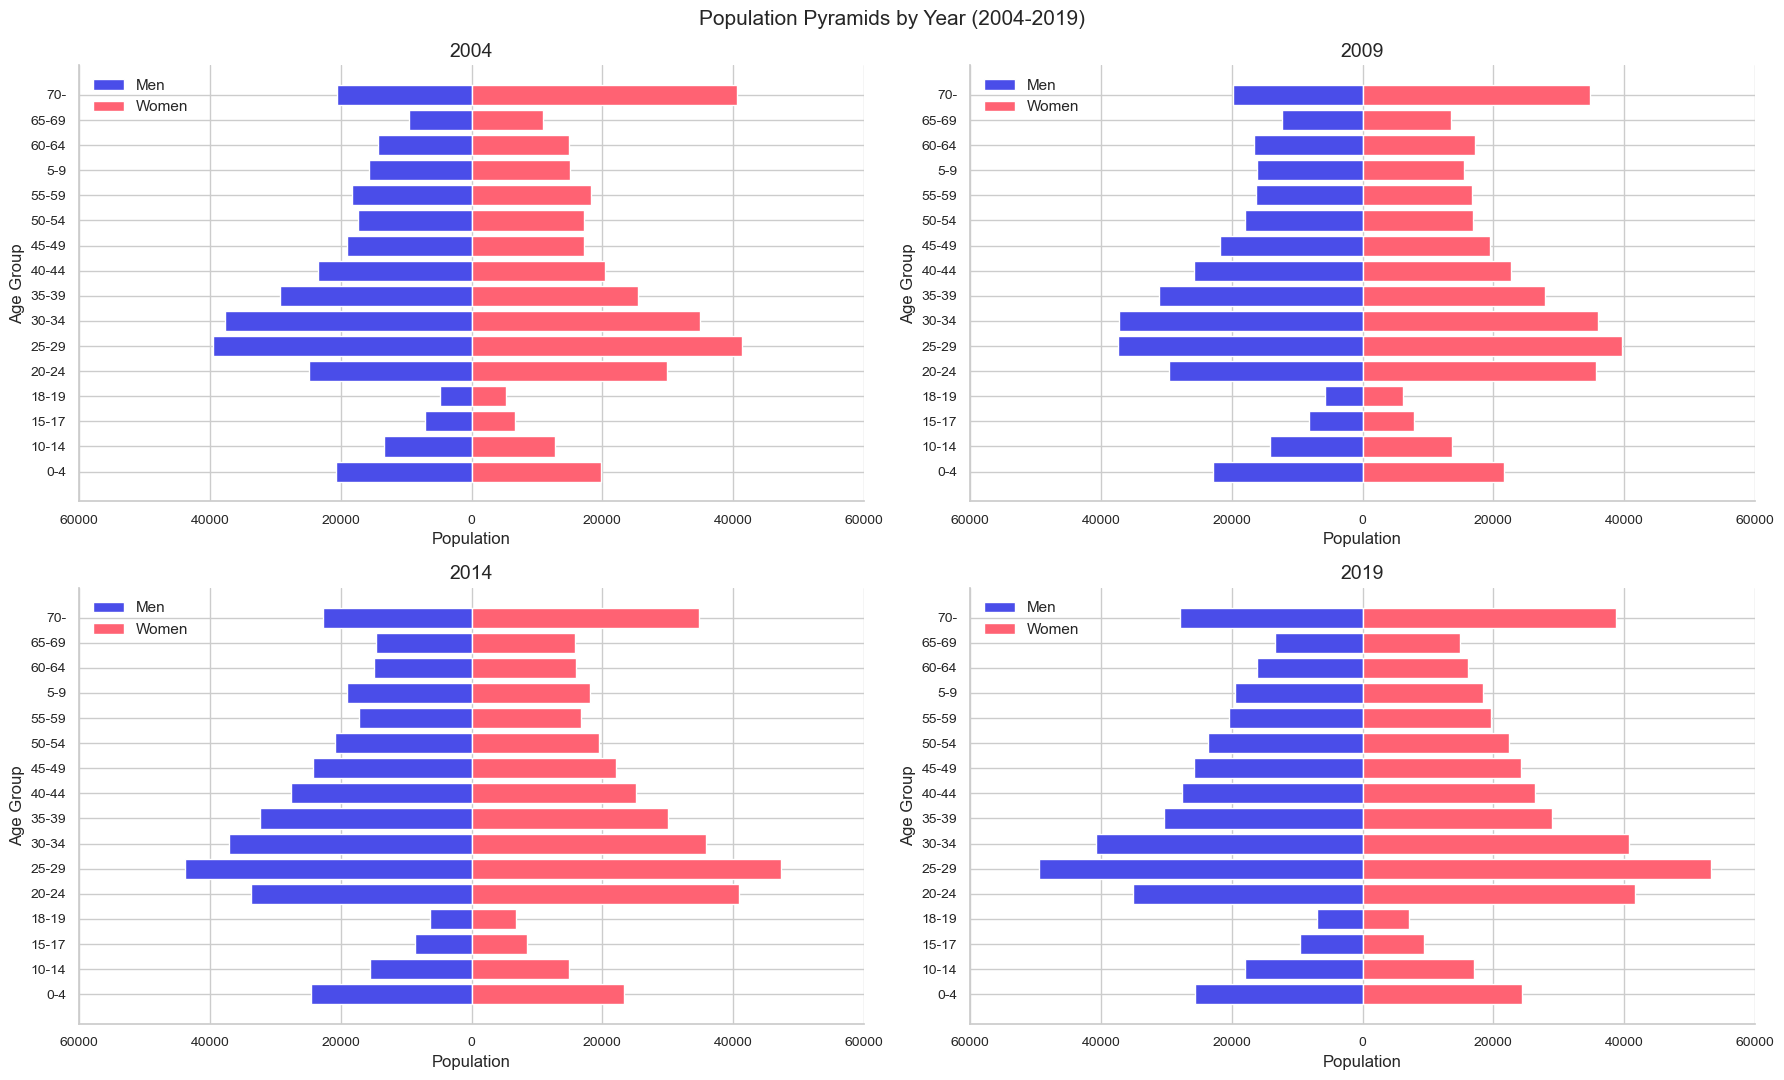

In [23]:
gender_translation = {'Kvinder': 'Women', 'Mænd': 'Men'}
df_demo_long['Gender'] = df_demo_long['Gender'].replace(gender_translation)
plot_population_pyramids(
    df_demo_long, 
    colors=(theme_colors[3], theme_colors[5]),
    suptitle="Population Pyramids by Year (2004-2019)")

It is particularly noteworthy how the *20–24*, *25–29*, and *30–34* age groups have grown over the years — a trend that becomes especially pronounced in the 2014 population inventory and continues to increase in 2019. This rise reflects a broader pattern: Copenhagen attract young adults, students, and early-career professionals. [10]

Interestingly, the increase in the *30–34* age group suggests that more people are choosing to stay in the city even as they move into later stages of adulthood. Where residents in this age bracket might previously have left Copenhagen to start families elsewhere. [10]

Meanwhile, the gender distribution is relatively stable over time, with equal distribution across most age groups. The only notable exception is among those aged *70-* and older, where women make up a larger share — a difference likely explained by women’s higher average life expectancy. [9]

**Population counts trends per constituency**

In [24]:
# Aggregate and map district names
pop_by_kreds_year = df_demo_long.groupby(['KredsNr', 'Year'])['Count'].sum().reset_index()
pop_by_kreds_year['KredsNr'] = pop_by_kreds_year['KredsNr'].replace(constituency_id_to_name)

line_plot_by_year(
    df=pop_by_kreds_year,
    x='Year',
    y='Count',
    cat='KredsNr',
    title="Population Development in Each Constituency (Count Based)",
    x_title="Year",
    y_title="Population Count",
    color_map=const_colors, 
    html='html_plots/population_count_by_constituency.html'
)

We observe a clear trend: the population in Copenhagen has been steadily increasing over the years, with some constituencies experiencing more pronounced growth than others — particularly *Sundbyvester* and *Vesterbro*. In contrast, areas like *Tårnby* and *Slots* have seen relatively little growth. Overall, the data suggests that more people are moving to the city. 

**Income Support type**

Now, we turn our attention to income support types in the Copenhagen area. We examine the different types of income support and how their distribution has changed over time — considering both the absolute number of recipients and the proportion of the population receiving each type of support.

In [25]:
# Create base summary
df_support_summary = (
    df_support_long.groupby(['SupportType', 'Year'])['Count']
    .mean()
    .reset_index())

# Pivot to get Total Number of Persons per year
df_totals = df_support_summary[df_support_summary['SupportType'] == 'Total Number of Persons']
df_totals = df_totals[['Year', 'Count']].rename(columns={'Count': 'TotalCount'})

# Merge total counts back to original summary
df_ratios = df_support_summary.merge(df_totals, on='Year')

# Filter out Total Number of Persons
df_ratios = df_ratios[df_ratios['SupportType'] != 'Total Number of Persons'].copy()

# Calculate ratio
df_ratios['RatioToTotal'] = df_ratios['Count'] / df_ratios['TotalCount']
df_ratios = df_ratios.sort_values(by=['Year', 'RatioToTotal'], ascending=False).reset_index(drop=True)
df_ratios['RatioToTotal'] = df_ratios['RatioToTotal'].apply(lambda x: f"{x:.2%}")

We choose to provide the result in table format this time

In [26]:
def render_scrollable_table(df, height=300):
    return HTML(df.to_html(classes='table table-striped', border=0, max_rows=1000, escape=False) + f"""
    <style>
        .output_html {{
            max-height: {height}px;
            overflow-y: scroll;
            display: block;
        }}
    </style>
    """)

render_scrollable_table(df_ratios[['Year', 'SupportType', 'Count', 'TotalCount', 'RatioToTotal']], height=300)

,Year,SupportType,Count,TotalCount,RatioToTotal
0,2019,No Received Benefits,45486.916667,66177.333333,68.73%
1,2019,State Pension,7323.666667,66177.333333,11.07%
2,2019,Parental Leave Benefits,2393.750000,66177.333333,3.62%
3,2019,Unemployment Benefits,2181.500000,66177.333333,3.30%
4,2019,Social Assistance (Cash Benefits),1704.750000,66177.333333,2.58%
5,2019,Disability Pension,1675.750000,66177.333333,2.53%
6,2019,Health / Disability Support,1216.708333,66177.333333,1.84%
7,2019,Activation Programs,511.500000,66177.333333,0.77%
8,2019,Early Retirement Pension,284.583333,66177.333333,0.43%
9,2014,No Received Benefits,40759.083333,61664.750000,66.10%


The table displays both the number of recipients and the percentage of the population receiving each type of income support in 2009, 2014, and 2019. There are nine different types of income support listed, and the total population for each year is shown in the `TotalCount` row. As previously seen in the population pyramid, this total has increased from 2009 to 2019.

The category `No Received Benefits` have ranged between 64% and 68% from 2009 to 2019, indicating that the majority of Copenhagen's population does not rely on income support.

Among the types of support, `State Pension` stands out as the most common, remaining steady at around 11% over the years. 

Overall, there appears to be little change in the distribution of support types over the years, suggesting that the proportion of the population receiving income support has remained stable over the last decade..

**Income per household**

Now, we look at the income per household in Copenhagen. We examine how the average income has changed over the years. 

In [27]:
df_income_filtered = df_income_long[df_income_long['IncomeMetric'].isin(income_brackets)].copy()

# Apply income order
df_income_filtered['IncomeMetric'] = pd.Categorical(df_income_filtered['IncomeMetric'], categories=income_brackets, ordered=True)

# Aggregate by Year and Income Bracket
df_income_grouped = df_income_filtered.groupby(['Year', 'IncomeMetric'], observed=True)['Value'].sum().reset_index()

# Normalize counts to percentages per year
df_income_grouped['Percentage'] = df_income_grouped.groupby('Year')['Value'].transform(lambda x: 100 * x / x.sum())

In [28]:
plot_grouped_percentage_bar(
    df=df_income_grouped,
    x_col='Year',
    y_col='Percentage',
    group_col='IncomeMetric',
    color_sequence=expanded_theme_colors[1:],
    category_order=income_brackets,
    title='Income Per Household Per Year (2009–2019)', 
    html='html_plots/income_dist_over_time.html',
)

It is interesting to see how average `household income` in Copenhagen has risen significantly over the past decade. In 2009, only 12.5% of households had an annual income of 750,000 DKK or more. By 2019, that figure had more than doubled to 27.8%, making it the largest income group — with a notable 8.6 percentage point lead over the second-highest group (500,000-749,999 DKK). At the same time, the share of households earning less than 149,999 DKK has dropped to just 6.6%, where in 2009 it was 19.5% reflecting a clear shift toward a more affluent urban population.

This transformation is especially noteworthy when viewed alongside demographic trends — including the growing share of young adults in the city. 

The broader socioeconomic shift is further reflected in long-term changes among families. In the 1990s, one in three children in Copenhagen came from working-class households. That share has now been cut in half, while the proportion of children from upper-class and upper-middle-class families has tripled. As one report puts it, “Copenhagen is becoming less of a city that all families can afford to live in — and more of a city for the well-off” [8]. 

<a id="3"></a>
## 3.  Data Analysis


### 3.1 Voting Trends in Copenhagen
 
> 🎵 *Election votes in each constituency*  
> 🎵 *Six elections, twenty years*  
> 🎵 *To track the shifts, the rise, the fears*

The first step in our analysis is to explore the election data. We will investigate how voting patterns and trends in Copenhagen have changed over the past two decades. In the **Basic Statistics** section, we examined voter turnout in each election year and the share of votes for the political wings (left and right). This provided a useful overview of voting behavior in Copenhagen, revealing that turnout has remained relatively stable over the years, with noticeable increases in 2007 and 2011, generally hovering around 84%.

Regarding wing shares, we observed that the left wing has consistently dominated elections in Copenhagen, with a slight upward trend over the years. However, the 2022 election marked a decline in the left-wing share, reflecting a shift in voter preference and the rise of the centrist party i.e. *Moderaterne*.

In this section, we take a closer look at how voting behavior in Copenhagen has evolved across different constituencies over time.

#### 3.1.1 Voter turnout across constituencies

First, we take a closer look at voter turnout - this time broken down by constituency. We will analyze how turnout has changed over the years within each constituency to determine whether there are significant differences in voting behavior across the various areas of Copenhagen.

In [29]:
# Total number of people who actually voted, per year and constituency
df_voter_turnout_const = df_elec_cph_long.query("Partyname == 'Afgivnestemmer'").groupby(['Year', 'KredsNr']).agg(TotalVotesCast=('Votes', 'sum')).reset_index()

# Total number of people who were eligible to vote, per year and constituency
df_voter_eligibility_const = df_elec_cph_long.query("Partyname == 'Stemmeberettigede'").groupby(['Year', 'KredsNr']).agg(TotalEligibleVoters=('Votes', 'sum')).reset_index()

# Voter turnout ratio = votes cast / eligible voters
df_turnout_ratio_const = pd.DataFrame(df_voter_turnout_const[['Year', 'KredsNr']].copy())
df_turnout_ratio_const['Ratio'] = df_voter_turnout_const['TotalVotesCast'] / df_voter_eligibility_const['TotalEligibleVoters']

# Add the overall turnout ratio of Copenhagen
df_turnout_ratio['KredsNr'] = 0 
df_turnout_ratio_const = pd.concat([df_turnout_ratio_const, df_turnout_ratio], ignore_index=True)

In [30]:
plot_bar_dist_per_const_multi(
    years=df_turnout_ratio_const['Year'].values,
    kreds_ids=df_turnout_ratio_const['KredsNr'].values,
    values=df_turnout_ratio_const['Ratio'].values,
    const_colors=const_colors,
    html="html_plots/vote_turnout_const.html",
    constituency_id_to_name=constituency_id_to_name,
    show_percentage=True,
    title="Voter Turnout in Copenhagen Constituencies (2005–2022)", 
    y_axis_title="Voter Turnout (%)"
)

The figure above shows voter turnout in each constituency for election years over the past two decades. We observe that the *Bispebjerg* constituency consistently has the lowest turnout across all elections, while *Falkoner* consistently has the highest. These findings become particularly interesting when we later examine population data to identify potential patterns that might explain the differences in voting behavior across constituencies.

When comparing constituency-level turnout to the overall average turnout in Copenhagen, we find that *Bispebjerg*, *Valby*, *Sundbyvest*, *Sundbyøster*, and *Brønshøj* all fall below the Copenhagen average over the election years. This suggests that these areas exhibit lower voter engagement compared to the rest of Copenhagen.


#### 3.1.2 Wing share across constituencies

> 🎵 *In Copenhagen’s twelve domains* \
> 🎵 *Did left-wing rise? Did right-wing wane?*

Next, we examine the share of votes for left- and right-wing parties in each constituency. This analysis helps us understand how the political landscape within Copenhagen has evolved over the years and whether certain areas have shifted in their political alignment.

In [31]:
# Get total voters per year and constituency
df_total_voters_const = df_elec_cph_parties.groupby(['Year', 'KredsNr'])['Votes'].sum().reset_index()
df_total_voters_const = df_total_voters_const.rename(columns={'Votes': 'TotalVotes'})

# Get vote sum per wing per year per constituency
df_wing_sum_const = df_elec_cph_parties.groupby(['Year', 'Wing', 'KredsNr'])['Votes'].sum().reset_index()

# Merge and compute wing ratio
df_wing_const_ratio = pd.merge(df_wing_sum_const, df_total_voters_const, on=['Year', 'KredsNr'])
df_wing_const_ratio['WingRatio'] = df_wing_const_ratio['Votes'] / df_wing_const_ratio['TotalVotes']

In [32]:
plot_stacked_bar_dist_per_const(
    years=df_wing_const_ratio['Year'].values,
    kreds_ids=df_wing_const_ratio['KredsNr'].values,
    counts=df_wing_const_ratio['Wing'].values, 
    legend='Wing',            
    values=df_wing_const_ratio['WingRatio'].values,
    html="html_plots/wing_share_votes_const.html",
    color_map=wing_colors,       
    const_order = const_order, 
    constituency_id_to_name=constituency_id_to_name,
    show_percentage=True,
    title="Wing Share across Constituency (2005-2022)",
    y_title="Wing Share (%)"
)

The figure above shows the share of votes for left- and right-wing parties in each constituency across the election years of the past two decades.

As previously noted, left-wing parties have historically dominated elections in Copenhagen, however, there are differences within the constituencies. Some constituencies are traditionally more right-wing oriented, particularly *Tårnby*, *Falkoner*, and *Slots*, and some traditonally very left wing oriented such as *Nørrebro*, *Bispebjerg* and *Vesterbro*. 

When looking at the trends over time, we however see that no matter the initial political position for the constituencies, we see a general gradual increase towards more left-wing votes over time. Meaning that the tradional left-wing constituencies have becomed more firm in the red polical beliefs, whereas the more tradtional right winged constituencies today show a more even split between left and right while leaning towards the left. 

An example of this is the constituency *Tårnby* first shifting to a left-wing majority in 2019 and 2022.

> 🎵 *We map the changes, district-wide* \
> 🎵 *To see where loyalties reside*

Let us now visualize the political share from a spatial perspective. We will create a map of Copenhagen to illustrate the distribution of left- and right-wing support across constituencies for each election year over the past two decades.

Each constituency will be color-coded based on the share of left-wing support, using a gradient that blends the traditional colors of the two blocs. A perfectly balanced split (50% left-wing, 50% right-wing) will appear as purple. If constituencies have full right-wing support they will be shown in pure blue, while those with full left-wing support will appear in pure red.

In [33]:
df_wing_const_ratio['Votes (%)'] = df_wing_const_ratio['WingRatio'] * 100

df_pivot_wing_freq = df_wing_const_ratio.pivot_table(
    index=["Year", "KredsNr"],
    columns="Wing",
    values="Votes (%)",
    fill_value=0
).reset_index()

df_pivot_wing_freq["pct_left"] = df_pivot_wing_freq["Left"] / (df_pivot_wing_freq["Right"] + df_pivot_wing_freq["Left"])
df_pivot_wing_freq["pct_right"] = df_pivot_wing_freq["Right"] / (df_pivot_wing_freq["Right"] + df_pivot_wing_freq["Left"])

In [34]:
## Loading the data and making a distict plot of the voter turnout and whether it is mostly right or left wing

geojson_folder = "Data/CopenhagenGeoData"

wing_cm = cm.LinearColormap(
            colors=['#00739b','purple', '#d52729'],
            vmin=0, vmax=1,
            caption='Political orientation: Right-wing (blue) to Left-wing (red)',)

cph_map = folium.Map(location=[55.6461, 12.5683], zoom_start=11.48, tiles=None, width='900px',height='600px')
folium.TileLayer("cartodbpositron", name=None, control=False).add_to(cph_map)

for year in sorted(df_pivot_wing_freq["Year"].unique()):
    fg = folium.map.FeatureGroup(name=str(year), overlay=False, show=(year == sorted(df_pivot_wing_freq["Year"].unique())[0]))


    df_year = df_pivot_wing_freq[df_pivot_wing_freq["Year"] == year]
    
    for _, row in df_year.iterrows():
        kreds_nr   = row["KredsNr"]
        kreds_name = constituency_id_to_name.get(kreds_nr)

        pct_right  = row["pct_right"]
        pct_left   = row["pct_left"]
        fill_color = wing_cm(pct_left)    

        geojson_path = os.path.join(geojson_folder, f"{kreds_name}.json")
        with open(geojson_path, encoding="utf-8") as f:
            geojson = json.load(f)

        tooltip_html = f"""
            <div style='background:white;color:black;padding:6px 8px;border-radius:0;text-align:center;'>
            <b>{kreds_name}</b><br>{round(pct_left*100)} % left
            </div>
            """
        # build the feature
        gj = folium.GeoJson(
            data=geojson,
            name=f"{kreds_name}_{year}",
            style_function=lambda _, c=fill_color: {
                "fillColor": c,
                "color": "black",
                "weight": 1,
                "fillOpacity": 1,
            },
            tooltip = folium.Tooltip(tooltip_html, sticky=True, parse_html=True)
        )
        gj.add_to(fg)
        
    fg.add_to(cph_map)

folium.LayerControl(collapsed=False).add_to(cph_map)

class Legend(MacroElement):
    def __init__(self, colormap, top='20px', left='15px'):
        super().__init__()
        self._name = 'Legend'
        self.colormap = colormap         
        self.top = top
        self.left = left
        self._template = Template(u"""
        {% macro html(this, kwargs) %}
        <div style="position: fixed;
                    top: {{ this.top }};
                    left: {{ this.left }};
                    z-index:9999;
                    background: none;">
            {{ this.colormap._repr_html_() | safe }}
        </div>
        {% endmacro %}
        """)

cph_map.add_child(Legend(wing_cm, top='10px', left='270px'))
cph_map.save("html_plots/map_wing_share.html")

In [35]:
IFrame(src="html_plots/map_wing_share.html", width='100%', height=600)

This map provides a clear visual representation of the political landscape in Copenhagen, allowing us to observe how support for left- and right-wing blocs have changed over the years across different constituencies.

One key observation is how the *Tårnby* constituency has become more balanced over time. In 2005 and 2007, it displayed a darker purple color, indicating a more right-wing support (44% in 2005). In more recent years, however, the purple has shifted slightly toward red, suggesting a modest increase in left-wing support — although *Tårnby* still remains more balanced (52% in 2022) than most other constituencies.

Overall, the map clearly shows which constituencies are predominantly left- or right-wing and how these dynamics have evolved. Constituencies like *Falkoner* and *Slotskredsen* appear more purple than others, reflecting a more even distribution between left- and right-wing blocs. In contrast, *Nørrebro* and *Bispebjerg* are noticeably more red, indicating a strong left-wing dominance.

When browsing through the election years, a broader trend becomes apparent: **Copenhagen as a whole has shifted toward greater left-wing support over time**. However, the 2022 election marks a slight reversal, with generally all constituencies appearing less red compared to previous years, signaling a relative decline in left-wing dominance and hightlight the dominance for the 2022 election that was characterized by the rise of a centrist government [7].

#### 3.1.3 Party support across constituencies

> 🎵 *With parties shifting left and right* \
> 🎵 *Do neighborhoods still match the hype?*

Now we take a closer look at the support for individual parties in each constituency. This will help us understand how support for different parties has changed over time in Copenhagen. 

In [36]:
# Drop the rows where the parties get 0 votes (meaning they are not in the election)
df_elec_cph_parties = df_elec_cph_parties.drop(df_elec_cph_parties[df_elec_cph_parties['Votes'] == 0].index)

# Total votes by Year & Party
df_party_votes = (df_elec_cph_parties.groupby(['Year','Partyname'], as_index=False)['Votes'].sum())

# Total votes per Year (for share calculation)
df_year_total = (df_party_votes.groupby('Year', as_index=False)['Votes'].sum().rename(columns={'Votes':'YearTotal'}))

# Calculate share
df_party_votes = df_party_votes.merge(df_year_total, on='Year')
df_party_votes['VoteShare'] = df_party_votes['Votes'] / df_party_votes['YearTotal']

In [37]:
plot_party_vote_share_over_time(df_party_votes, party_colors, 'html_plots/vote_share_over_time.html')

This figure shows the share of votes for each party across the election years over the past two decades: 

- We observe that the *Socialdemokratiet* party has consistently received the highest share of votes across all years. However, in 2019, they only received slightly more votes than *Enhedslisten*, which is perhaps not surprising, as the 2019 election was dominated by green transition issues.

- It is particularly interesting to see how *Enhedslisten* has developed over the years, becoming one of the most popular parties in Copenhagen. In 2005, they received only 8.8% of the votes, but by 2019, they had doubled their share (16.8%).

- *Radikale Venstre* also shows an interesting pattern, with varying trends across the elections. In some years, such as 2005, 2011, and 2019, they were very popular and secured a significant share of the votes. It seems evident that their popularity peaks roughly every second election.

- For the right-wing parties, *Venstre* stands out as the most popular. Their vote share ranged between 17.1% and 8.4% over the years. The further drop in 2022 can likely be explained by the emergence of the new party *Moderaterne*, founded in 2021 by former Venstre chairman Lars Løkke Rasmussen.

- Finally, we notice the significant decline of *Dansk Folkeparti*. In 2005, they received 11.1% of the votes, peaking at 11.5% in 2015, but by 2022, they only secured 1.6%. This dramatic fall highlights their declining popularity, possibly influenced by the rise of new right-wing extremist parties or the shifting of *Socialdemokratiet* toward the right regarding the immigration policy. 

Now, we will take a closer look at the support for individual parties in each constituency. This will help us better understand how party support has changed over the years across the constituency in Copenhagen.

For simplicity, we will focus only on the top parties; These are defined as the five parties that received the most votes in each constituency in each election year. By doing so, we can concentrate on the most relevant parties and their support trends. This approach means that for each constituency and each election year, we select the top five parties. The set of all these parties are used for the analysis.

In [38]:
# Calculate vote percentages per party, per year, per district
df_party_freq = (
    df_elec_cph_parties.groupby(['Year', 'Partyname', 'KredsNr'])['Votes'].sum()
    / df_elec_cph_parties.groupby(['Year', 'KredsNr'])['Votes'].sum()
    * 100
).reset_index().rename(columns={'Votes': 'Votes (%)'}).round(2)

# Filter top 5 parties per district per year
top_parties_per_district_year = (
    df_party_freq
    .sort_values(['Year', 'KredsNr', 'Votes (%)'], ascending=[True, True, False])
    .groupby(['Year', 'KredsNr'])
    .head(5))

df_top5_party_freq = df_party_freq[df_party_freq['Partyname'].isin(top_parties_per_district_year['Partyname'])].reset_index(drop=True)

print(f"The top parties: \n {df_top5_party_freq['Partyname'].unique()}")


The top parties: 
 ['A.Socialdemokratiet' 'B.DetRadikaleVenstre'
 'C.DetKonservativeFolkeparti' 'F.SF-SocialistiskFolkeparti'
 'O.DanskFolkeparti' 'V.Venstre,DanmarksLiberaleParti'
 'Ø.Enhedslisten-DeRød-Grønne' 'I.LiberalAlliance' 'Å.Alternativet'
 'M.Moderaterne']


In [39]:
plot_party_vote_share_dropdown(
    df_top5_party_freq,
    party_colors=party_colors,
    constituency_name_to_id=constituency_name_to_id,
    const_order=const_order
)

This figure allows us to explore the support for individual parties in each constituency over the past two decades.

- First, we observe that there are a total of 10 different parties that have appeared among the top five most popular parties across the constituencies. For example, *Moderaterne* and *Liberal Alliance* are only present in the most recent election, as they are relatively new parties.

- In the *Østerbro* constituency, we see that while *Socialdemokratiet* has generally been among the most popular parties, it has not always been the winning party. In both 2011 and 2019, *Radikale Venstre* received the most votes. A similar pattern is observed in *Indre By*, where *Radikale Venstre* was the most popular party in 2005, 2011, and 2019, while *Socialistisk Folkeparti* led in 2007.

- In *Nørrebro*, we observe that *Enhedslisten* has been the most popular party since 2011. Interestingly, in 2015, *Alternativet* received more votes than *Socialdemokratiet*. In fact, *Socialdemokratiet* has never been the leading party in *Nørrebro*.

- It is also noteworthy how the *Falkoner*, *Slotskredsen*, and *Tårnby* constituencies exhibit different voting behavior compared to the others. In these areas, several right-wing parties — such as *Venstre*, *Dansk Folkeparti*, *Liberal Alliance*, and *Konservative Folkeparti* — have been among the most popular.

Now let us visualize the winning party in each constituency for each election year in a map, this will easier give us an overview of the winning party in each constituency.

In [40]:
df_winning_party_const = df_party_freq.loc[
    df_party_freq.groupby(['Year', 'KredsNr'])['Votes (%)'].idxmax()
].reset_index(drop=True)

geojson_folder = "Data/CopenhagenGeoData"

m_winning_party = folium.Map(location=[55.6461, 12.5683], zoom_start=11.48, tiles=None, width='900px', height='600px')
folium.TileLayer("cartodbpositron", name=None, control=False).add_to(m_winning_party)

# Loop over years
for year in sorted(df_winning_party_const["Year"].unique()):
    fg = folium.map.FeatureGroup(name=str(year), overlay=False, show=(year == sorted(df_pivot_wing_freq["Year"].unique())[0]))

    df_year = df_winning_party_const[df_winning_party_const["Year"] == year]
    
    for _, row in df_year.iterrows():
        kreds_nr   = row["KredsNr"]
        kreds_name = constituency_id_to_name.get(kreds_nr)
        party_name = row["Partyname"]

        # Get party color
        fill_color = party_colors.get(party_name, "#cccccc")  # default grey if party not in dict

        geojson_path = os.path.join(geojson_folder, f"{kreds_name}.json")
        if not os.path.exists(geojson_path):
            continue  # skip if geojson not found

        with open(geojson_path, encoding="utf-8") as f:
            geojson = json.load(f)

        tooltip_html = f"""
            <div style='background:white;color:black;padding:6px 8px;border-radius:0;text-align:center;'>
            <b>{kreds_name}</b><br>Winning party: {party_name}
            <br>Votes: {row["Votes (%)"]} %
            </div>
            """

        # build the feature
        gj = folium.GeoJson(
            data=geojson,
            name=f"{kreds_name}_{year}",
            style_function=lambda _, c=fill_color: {
                "fillColor": c,
                "color": "black",
                "weight": 1,
                "fillOpacity": 1,
            },
            tooltip=folium.Tooltip(tooltip_html, sticky=True, parse_html=True),
        )
        gj.add_to(fg)
        
    fg.add_to(m_winning_party)

folium.LayerControl(collapsed=False).add_to(m_winning_party)

m_winning_party.save("html_plots/map_winning_party.html")

In [41]:
IFrame(src='html_plots/map_winning_party.html', width='100%', height=600)

The map above shows the winning party in each constituency for each election year over the past two decades. The constituencies are colored based on the winning party, with different colors representing different parties. Note that we define the winning party as the party that received the most votes in each constituency, however, in some constituencies, the winning party may only have received a slightly higher share of votes than the second largest party, e.g. in *Østerbro* in 2005, where *Socialdemokratiet* received 20.4% of the votes, while *Radikale Venstre* received 20.3%.

- In 2005, we see that *Socialdemokratiet* was the winning party in most constituencies, while *Radikale Venstre* won in a few constituencies, including *Nørrebro*, *Indre By*, and *Falkoner*. 

- In 2007, *Socialistisk Folkeparti* became the winning party in *Nørrebro*, *Indre By*, and *Vesterbro*, while *Socialdemokratiet* regained *Falkoner*. 

- In 2011, the distribution of winning parties became more diverse. Notably, *Venstre* won in *Tårnby* and *Slots*, while in central Copenhagen, both *Radikale Venstre* and *Enhedslisten* won in different constituencies.

- In 2015, *Socialdemokratiet* dominated, winning most constituencies, with *Enhedslisten* securing *Nørrebro* and *Vesterbro*.

- In 2019, *Radikale Venstre* won in *Indre By*, *Falkoner*, and *Østerbro*, where *Venstre* won *Slot*, and *Enhedslisten* won in *Nørrebro*, *Bispebjerg* and *Vesterbro*. 

- In the most recent election, 2022, *Socialdemokratiet* maintained dominance across most constituencies, while *Enhedslisten* won in several areas, including *Nørrebro*, *Bispebjerg*, *Indre By*, and *Vesterbro*.


### 3.2 Population trends and patterns


> 🎵 *Did demographics play a role?*  
> 🎵 *Did new arrivals change the poll?*  
> 🎵 *We map the changes, district-wide,*  
> 🎵 *To see where loyalties reside.*


After the deep dive into the voting patterns across each constituency, we will now do a deep dive into the sociodemographics of each constituency in Copenhagen over the years. 
We will look into how the sociodemographic measures has changed over time (Each year that Danmarks Statistik has carried out the demographic statistics: 2004, 2009, 2014, 2019) for each constituency, and focus on both differences between neighboorhoods, evolvment over time, and potential differences in evolment over time for each neighboorhod.  

The demographic measure we will explore are listed here in this respective order, of what we will look into first:

* Age distribution
* Highest achieved education
* Non-Danish Origin
* Income Support (social benefits)
* Income per household
* Housing situation

#### 3.2.1 Demographics data

> 🎵 *Is Nørrebro all red and bold?*


First, we explore the common distributional factors in a population. These data will help us understand if there is a major difference between the constituencies in demographics. We can hold the conclusions from this together with the elections data and see if the trends match.

TODO: omformuler

**Population demographics**

... motivate

In [42]:
# Map the age groups to broader categories
demo_population = df_demo_long.copy()

age_groups = {
    '0-4': '0-9',
    '5-9': '0-9',
    '10-14': '10-19',
    '15-17': '10-19',
    '18-19': '10-19',
    '20-24': '20-29',
    '25-29': '20-29',
    '30-34': '30-39',
    '35-39': '30-39',
    '40-44': '40-49',
    '45-49': '40-49',
    '50-54': '50-59',
    '55-59': '50-59',
    '60-64': '60-69',
    '65-69': '60-69',
    '70-': '70+'}

demo_population['Age_decades'] = demo_population['Age'].map(age_groups)

In [43]:
#TODO move to plot file + farver + rækkefølge af legend + mere x-axis spacing + constituency right + no box around legends + y axis legend "Population (%)" + align with Jasmin exisiting plots
def plot_stacked_line_from_grouped_df(
    df_grouped,
    colors,
    constituency_id_to_name,
    show_percentage=False,
    title="",
    y_axis_title="",
    group_name="",
    group_order=[],
    html = ""
):

    column_names = df_grouped.columns.to_list()

    # Prepare DataFrame
    df = df_grouped.copy()
    df['KredsName'] = df['KredsNr'].map(constituency_id_to_name)
    df['Year'] = df['Year'].astype(str)
    df['Year'] = pd.Categorical(df['Year'], categories=sorted(df['Year'].unique()), ordered=True)

    # Calculate percentage per year and kreds if needed
    if show_percentage:
        df['DisplayValue'] = df.groupby(['KredsName', 'Year'], observed=True)['Count'].transform(lambda x: x / x.sum() * 100)
    else:
        df['DisplayValue'] = df['Count']

    # Define age group order explicitly
    constituencies = df['KredsName'].dropna().unique()

    fig = go.Figure()

    # Add traces
    for i, constituency in enumerate(constituencies):
        for group in group_order:
            sub = df[(df['KredsName'] == constituency) & (df[column_names[2]] == group)]
            sub = sub.sort_values('Year')

            fig.add_trace(go.Scatter(
                x=sub['Year'],
                y=sub['DisplayValue'],
                mode='lines',
                stackgroup='one',
                name=f"{group}",
                legendgroup=group,
                showlegend=True,
                line=dict(color=colors.get(group)),
                fillcolor=colors.get(group),
                line_shape="linear",
                visible=(i == 0),
                hovertemplate=(
                    f"<b>{group}</b><br>Year: %{{x}}<br>"
                    f"{'%' if show_percentage else 'Count'}: %{{y:.1f}}<extra></extra>")
            ))


    # Dropdown buttons
    buttons = []
    for i, constituency in enumerate(constituencies):
        visibility = []
        for j in range(len(constituencies)):
            visibility.extend([(j == i)] * len(group_order))
        buttons.append(dict(
            label=constituency,
            method='update',
            args=[{"visible": visibility}, {"title": {"text": f"{title} - {constituency}", "x": 0.5, "xanchor": "center"}}]

        ))

    # Layout
    fig.update_layout(
        updatemenus=[dict(
            buttons=buttons,
            direction="down",
            showactive=True,
            x=0.0, xanchor="left",
            y=1.1, yanchor="top"
        )],
        title=dict(text=f"{title} - {constituencies[0]}", x=0.5),
        xaxis_title="Year of Data Collection",
        yaxis_title=y_axis_title if not show_percentage else "Percentage",
        xaxis=dict(type='category'),
        hovermode="x unified",
        plot_bgcolor='rgba(0,0,0,0)',
        font=dict(family="Arial", size=12),
        legend_title_text=group_name,
        legend=dict(orientation="v", bordercolor="Black", borderwidth=1),
        #legend_tracegroupgap=0  # removes gaps
    )

    for trace in fig.data:
        trace.legendgroup = trace.name

    fig.update_xaxes(showline=True, linewidth=1, linecolor='lightgrey',
                     showgrid=True, gridwidth=1, gridcolor='lightgrey')
    fig.update_yaxes(showline=True, linewidth=1, linecolor='lightgrey',
                     showgrid=True, gridwidth=1, gridcolor='lightgrey')
    fig.write_html(html)
    fig.show()

# Group by district, year, and educationLevel type
demo_by_kreds_year_age = demo_population.groupby(['KredsNr', 'Year', 'Age_decades'])['Count'].sum().reset_index()

plot_stacked_line_from_grouped_df(
    df_grouped=demo_by_kreds_year_age,
    colors = dict(zip(age_groups, expanded_theme_colors[:len(age_groups)])),
    constituency_id_to_name=constituency_id_to_name,
    show_percentage=True,
    title="Age Distribution per Year",
    y_axis_title="Population Count",
    group_name = "Age Group",
    group_order = ["0-9", "10-19", "20-29", "30-39", "40-49", "50-59", "60-69", "70+"],
    html = 'html_plots/age_stacked_line_plot.html'
)

**Education**

.. motivate

In [44]:


# Drop 'unspecified' education level
df_educ_long = df_educ_long[~(df_educ_long['EducationLevel'] == 'Unspecified')]


# Copy the DataFrame
educ_population = df_educ_long.copy()

# Group by district, year, and educationLevel type
educ_by_kreds_year_educationLevel = educ_population.groupby(['KredsNr', 'Year', 'EducationLevel'])['Count'].sum().reset_index()


In [45]:
plot_stacked_line_from_grouped_df(
    df_grouped=educ_by_kreds_year_educationLevel,
    colors=dict(zip(age_groups, expanded_theme_colors[:len(age_groups)])),
    constituency_id_to_name=constituency_id_to_name,
    show_percentage=True,
    title="Highest Achieved Education Distribution per Year",
    y_axis_title="Population Count",
    group_name = "Education Level",
    group_order = ['Primary School', 'General Upper Secondary', 'Vocational Education', 'Short-cycle Higher Education', 'Medium-cycle Higher Education', 'Long-cycle Higher Education'],
    html = 'html_plots/education_stacked_line_plot.html'
)

**Origin**

#### 3.2.2 Socioeconomic factors

  
> 🎵 *Does Frederiksberg stay rich and cold?*  


Now we will dive deeper into the factors that differentiate the population and which might have an influence in the oppinions and major policy priorities in the population. We seek to investigate if there is a connection between party and income factor as has been suggested in various sources [11] and which appears to be a common myth [12]. We suspect that this data will give us insights into whether the common stereotypes are true and whether there are other unnoticed trends for the constituencies.

**Income Support**

Understanding how income support is distributed across constituencies can provide valuable insights into the socioeconomic composition of the population. By examining how different types of financial support are distributed, we gain a deeper perspective on economic need and public dependency — factors that demographic measures alone may not capture. This analysis can reveal structural differences between districts that go beyond age and education, highlighting varying levels of social vulnerability and economic stability.

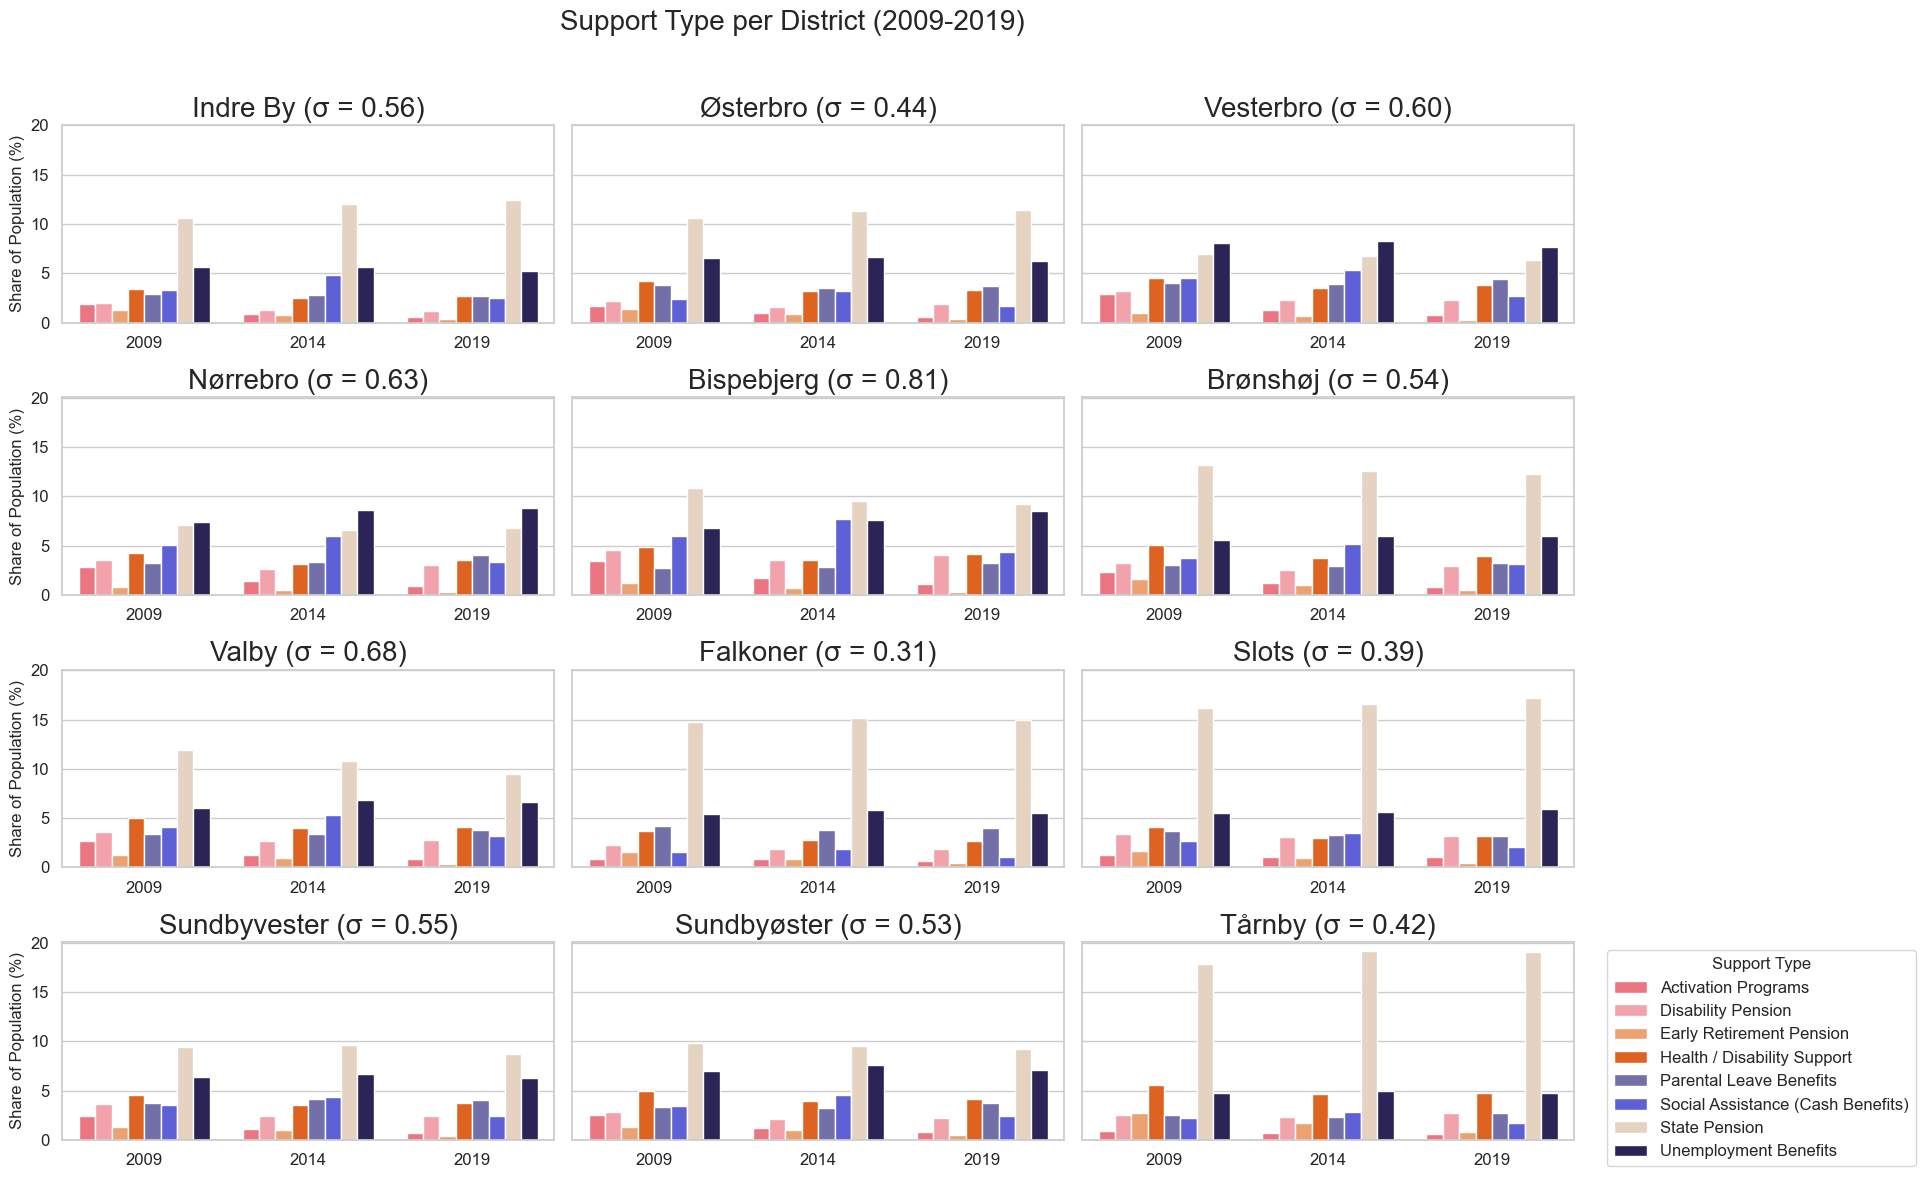

In [46]:
# Support income analysis. Group data
df_support_long = df_support_long[~df_support_long['Year'].isin(['2005', '2022'])]
df_support_long['Year'] = df_support_long['Year'].replace(year_replacements)

# Remove total person rows, map districts
df = df_support_long[df_support_long['SupportType'] != 'Total Number of Persons'].copy()
df['District'] = df['KredsNr'].map(constituency_id_to_name)

# Group and calculate % per district/year
grouped = df.groupby(['Year', 'SupportType', 'District'], observed=True)['Count'].sum().reset_index()
totals = grouped.groupby(['Year', 'District'], observed=True)['Count'].sum().reset_index(name='Total')
grouped = grouped.merge(totals, on=['Year', 'District'])
grouped['Percentage'] = grouped['Count'] / grouped['Total'] * 100


# Static seaborn plot
plot_static_support_by_district(grouped, const_order, expanded_theme_colors)

From this plot we first notice that there is almost no difference in the support composition within each constituency across the years. The standard deviation (σ) shown next to each district title represents the average variation in support types across the years 2009, 2014, and 2019. For each district, the standard deviation of each support type's percentage over time is calculated, and then these values are averaged. This provides a summary measure of how stable or volatile the support distribution is within each district across time.
We see that *Bispebjerg* and *Valby* have the most changes in support type. For example, we see that *Bispebjerg* actually has an notably increase in `Unemployment Benefits` and a decrease in `State Pension`. Oppositely, *Falkoner* and *Slots* have lower change in support type.

While the composition of support types within each constituency remains relatively stable over time (2009-2019), it is also important to examine how these compositions differ across constituencies. This variation helps reveal structural differences in economic support needs between constituencies.

Please note, from our explorative analysis, we know that approximately 10,000 people move between districts over the years. The persistence of support distributions despite this movement suggests that new residents tend to reflect the existing support needs of the districts they move into, reinforcing socioeconomic patterns rather than altering them.

In [47]:
output_notebook()
plot_support_by_district(grouped, const_order, expanded_theme_colors, "html_plots/income_districts_stacked_bar.html")

Loading BokehJS ...

This figure shows a clear comparison of the income support received for the different contituencies compared to each other.

* *Tårnby*, *Falkoner* and *Slots* has the highest relative percentages of `State pension`. This aligns well with an older population in these constituencies as we saw earlier for the age distribution.
    *  *Tårnby* also has a relatively high percentage of people on `Early Retirement Pension`.
* The `Unemployment Benefits` are highest in *Nørrebro*, *Vesterbro*, *Sundbyøster* and *Bispebjerg*.

It should be noted that SU (support for students) does not appear in these plots because this variable is not in the dataset from **Den Danske Valgbase**.

The `No Received Benefits` which technically is a support type is used to normalize the other support types within each year, since we visualize as share of the population. For all constituencies this variable is by far the most common.

**Income**

After looking at the support type we want to look at how much the residents in Copenhagen actually earn. In the explorative analysis we saw that there was an overall significant increase in how much the households in Copenhagen earned on a yearly basis. We want to dive deeper into this and visualize the income per households for the Copenhagen constituencies. Is there a difference and is it true that some districts earn more than other districts?

In [48]:
# Group by district, year, and income level
income_by_kreds_year = df_income_filtered.groupby(['KredsNr', 'Year', 'IncomeMetric'], observed = True)['Value'].sum().reset_index()
income_by_kreds_year.columns = ['KredsNr', 'Year', 'IncomeMetric', 'Count']

df_income_filtered['District'] = df_income_filtered['KredsNr'].map(constituency_id_to_name)
df_grouped = df_income_filtered.groupby(['Year', 'IncomeMetric', 'District'], observed=True)['Value'].sum().reset_index()

# Normalize to percentages within each district and year
df_grouped['Percentage'] = df_grouped.groupby(['Year', 'District'])['Value'].transform(lambda x: 100 * x / x.sum())

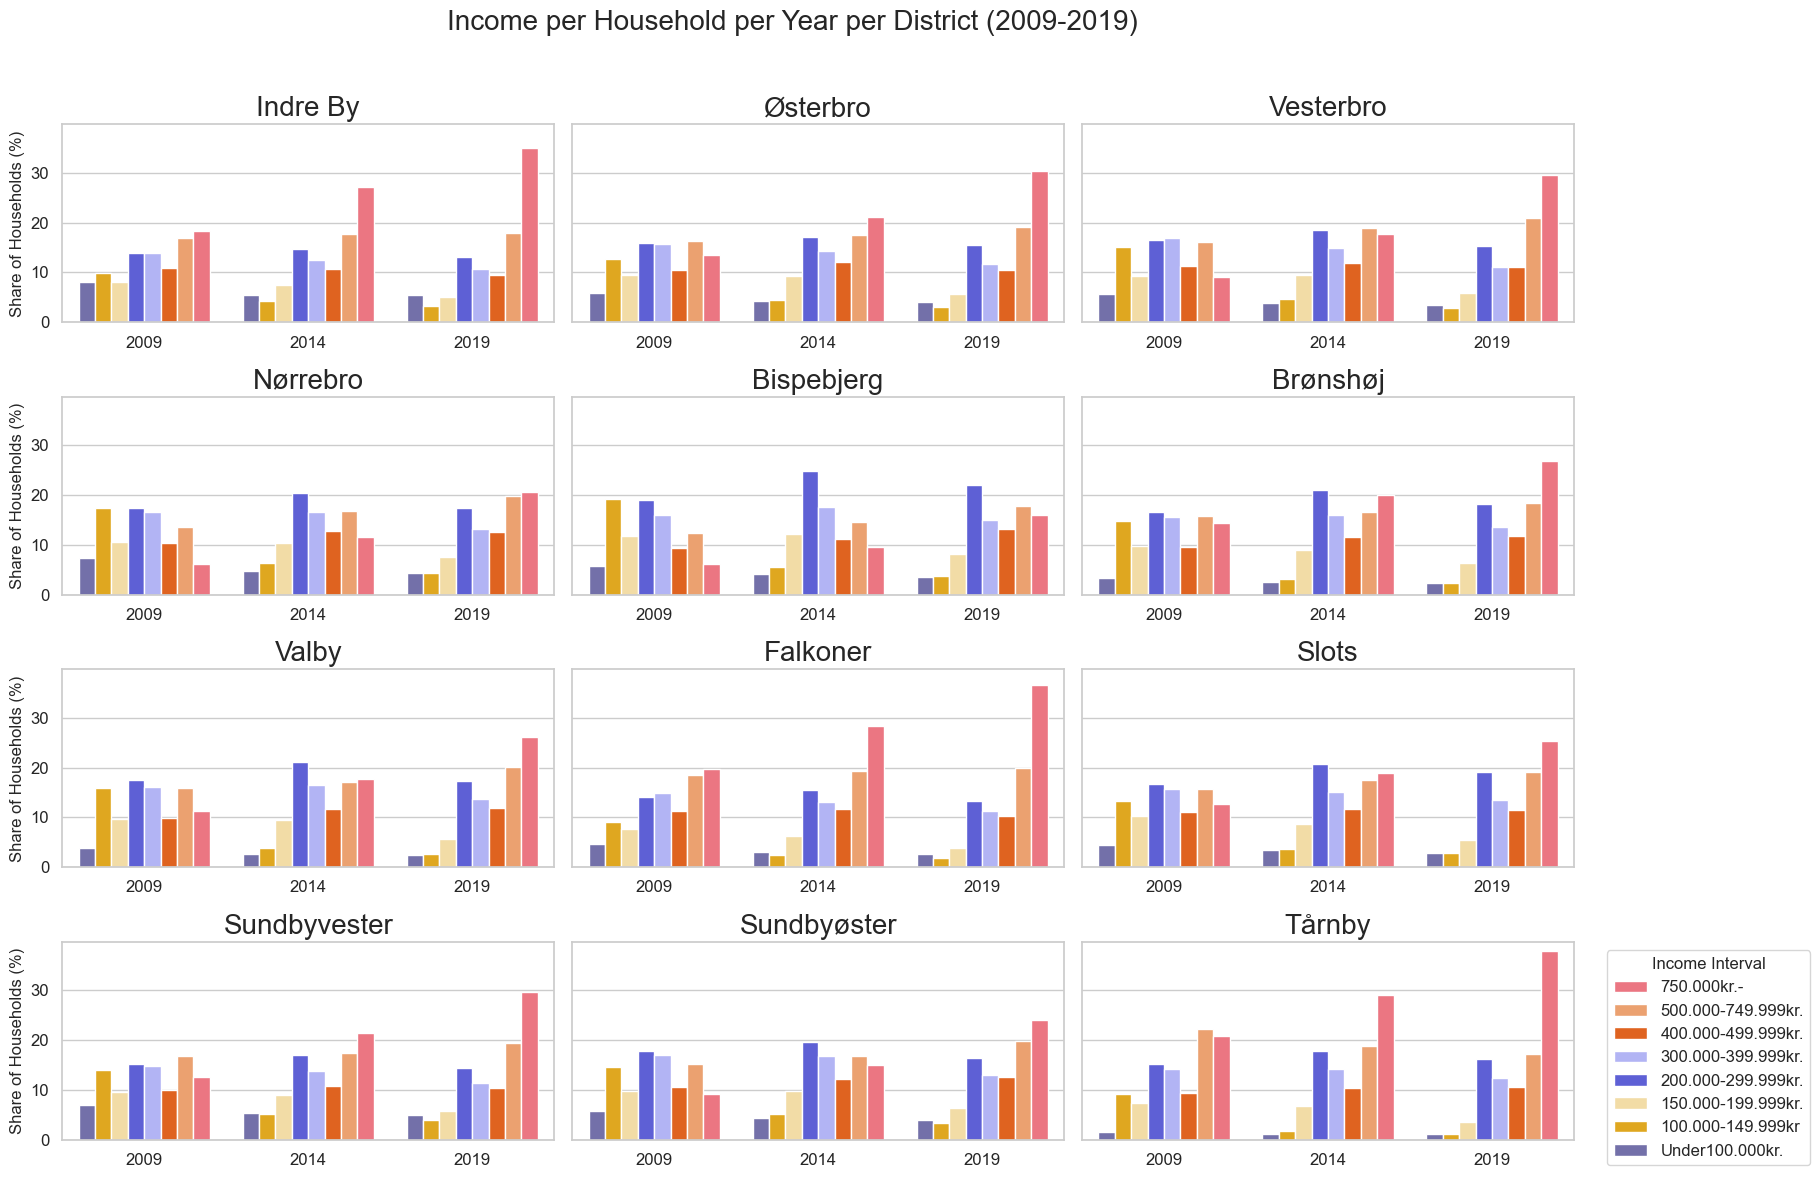

In [51]:
# This is a static, seaborn plot
sns.set_theme(style="whitegrid", font="Arial")

# Ensure districts in data match the desired order
districts = [d for d in const_order if d in df_grouped['District'].unique()]
fig, axes = plt.subplots(4, 3, figsize=(16, 12), sharey=True)
axes = axes.flatten()

# Apply custom colors
palette = dict(zip(income_brackets, expanded_theme_colors[1:1+len(income_brackets)]))

# Plot per district
for idx, district in enumerate(districts):
    ax = axes[idx]
    df_district = df_grouped[df_grouped['District'] == district]
    sns.barplot(
        data=df_district,
        x='Year',
        y='Percentage',
        hue='IncomeMetric',
        order=sorted(df_district['Year'].unique()),
        hue_order=income_brackets,
        errorbar=None,
        palette=palette,
        ax=ax
    )
    ax.set_title(district, fontsize=20, fontname='Arial')
    ax.set_xlabel('')
    ax.set_ylabel('Share of Households (%)', fontsize=12)
    ax.tick_params(axis='both', labelsize=12)
    ax.legend_.remove()

fig.suptitle('Income per Household per Year per District (2009-2019)', fontsize=20, fontname='Arial')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.legend(*[x[::-1] for x in axes[0].get_legend_handles_labels()], title='Income Interval', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12, title_fontsize=12)
plt.show()


From this figure we see a clear difference in how much the households in the different constituencies earn per year. Overall, all constituencies have a larger share of the population who earn more, so there is a general tendency that the share of households with income 500,000-749,999DKK and 750,000DKK and above increases for all constituencies. I.e. it seems the relative increase over the districts is the same, however, the initial share of people with an income above 400,000DKK per year varies across the districts.

*Tårnby*, *Falkoner* and *Indre By* are the districts with the highest income per year. In 2022, these three districts have around 35% or more of the households with an income above 750,000DKK per year.

This is not the same for all of the districts in Copenhagen. *Nørrebro* and *Bispebjerg* are among the districts that have a more diverse income spectrum per household. Although, the share of the households that earn between 100,000 and 149,999DKK a year drops for these districts too. 

TODO: Kan du ikke bruge fra population count som et argument for at folk kommer hertil, kilde sagde også det er de rige som kommer hertil 

All this points towards that all districts in Copenhagen overall has a higher income on average. However, as stated earlier in the explorative analysis, it is not visible in the data if the people are the same across the years. We know from the population count analysis that all districts' populations increase. However, it is not possible from this data to say if the *people* are the same. People could move, and other could move in, together with the general migration to Copenhagen. We cannot conclude on the reason for this, only that the people (household) in the Copenhagen area earn more over the time period. 
> måske: man kunne måske tro der kommer færre households og ratio så stiger der tjener mere. Det skal jeg lige kommentere på at der faktisk også kommer flere housholds counts! Så både flere households, flere mennesker (previous analysis) og større average income per household. TODO, TODO: 

The plot only shows that the income per district has in general increase, which needs to be referenced while stating that Copenhagen has becomed a more expensive place to live - "a city for the well-off" [8]. This would explain the clear increase in income that we see. 

In regard to comparing this socioeconomic data to the election data, we can only conclude that the composition of residents in Copenhagen has changed - either new residents or we can assume the residents are changed by their economy if they earn more over the last elections - [11] and [12].

For the website, we make the plot interactive:


TODO: flip the legend

In [50]:
# Group income by KredsNr, Year, IncomeMetric
income_by_kreds_year = df_income_filtered.groupby(['KredsNr', 'Year', 'IncomeMetric'], observed=True)['Value'].sum().reset_index()
income_by_kreds_year.columns = ['KredsNr', 'Year', 'IncomeMetric', 'Count']

# Apply district name and compute percentage
income_by_kreds_year['District'] = income_by_kreds_year['KredsNr'].map(constituency_id_to_name)
income_by_kreds_year['Percentage'] = income_by_kreds_year.groupby(['Year', 'District'])['Count'].transform(lambda x: 100 * x / x.sum())

# Color map and order
income_color_map = dict(zip(income_brackets, expanded_theme_colors[1:1+len(income_brackets)]))

# Plot
plot_stacked_bar_income_by_district(
    df_grouped=income_by_kreds_year,
    colors=dict(zip(income_brackets, expanded_theme_colors[1:1+len(income_brackets)])),
    constituency_id_to_name=constituency_id_to_name,
    group_order=income_brackets,
    html="html_plots/income_districts_stacked_bar.html"
)

This plot shows the same as the grouped barplots above. The plot however, easilier visualizes the income interval relative to each other within a year. When clicking the toggle it is possible to choose another district. Thereby, it is not as easy to compare district wise side by side as the static plot, but the interactive plot is nicer to include in the website.

**Living area Size**

In the final part of our sociodemographic analysis, we investigate the average living area size of households in Copenhagen. This indicator is closely linked to household income, as higher-income households generally have access to larger living spaces — a pattern well-documented in Danish housing studies [14].

The dataset includes all dwelling types — apartments, houses, studios, and more — and covers every registered household in the Copenhagen area, offering a comprehensive view of spatial living conditions across the city.

Dropped due to 'Oplystareal': 0.0 (0.000%)


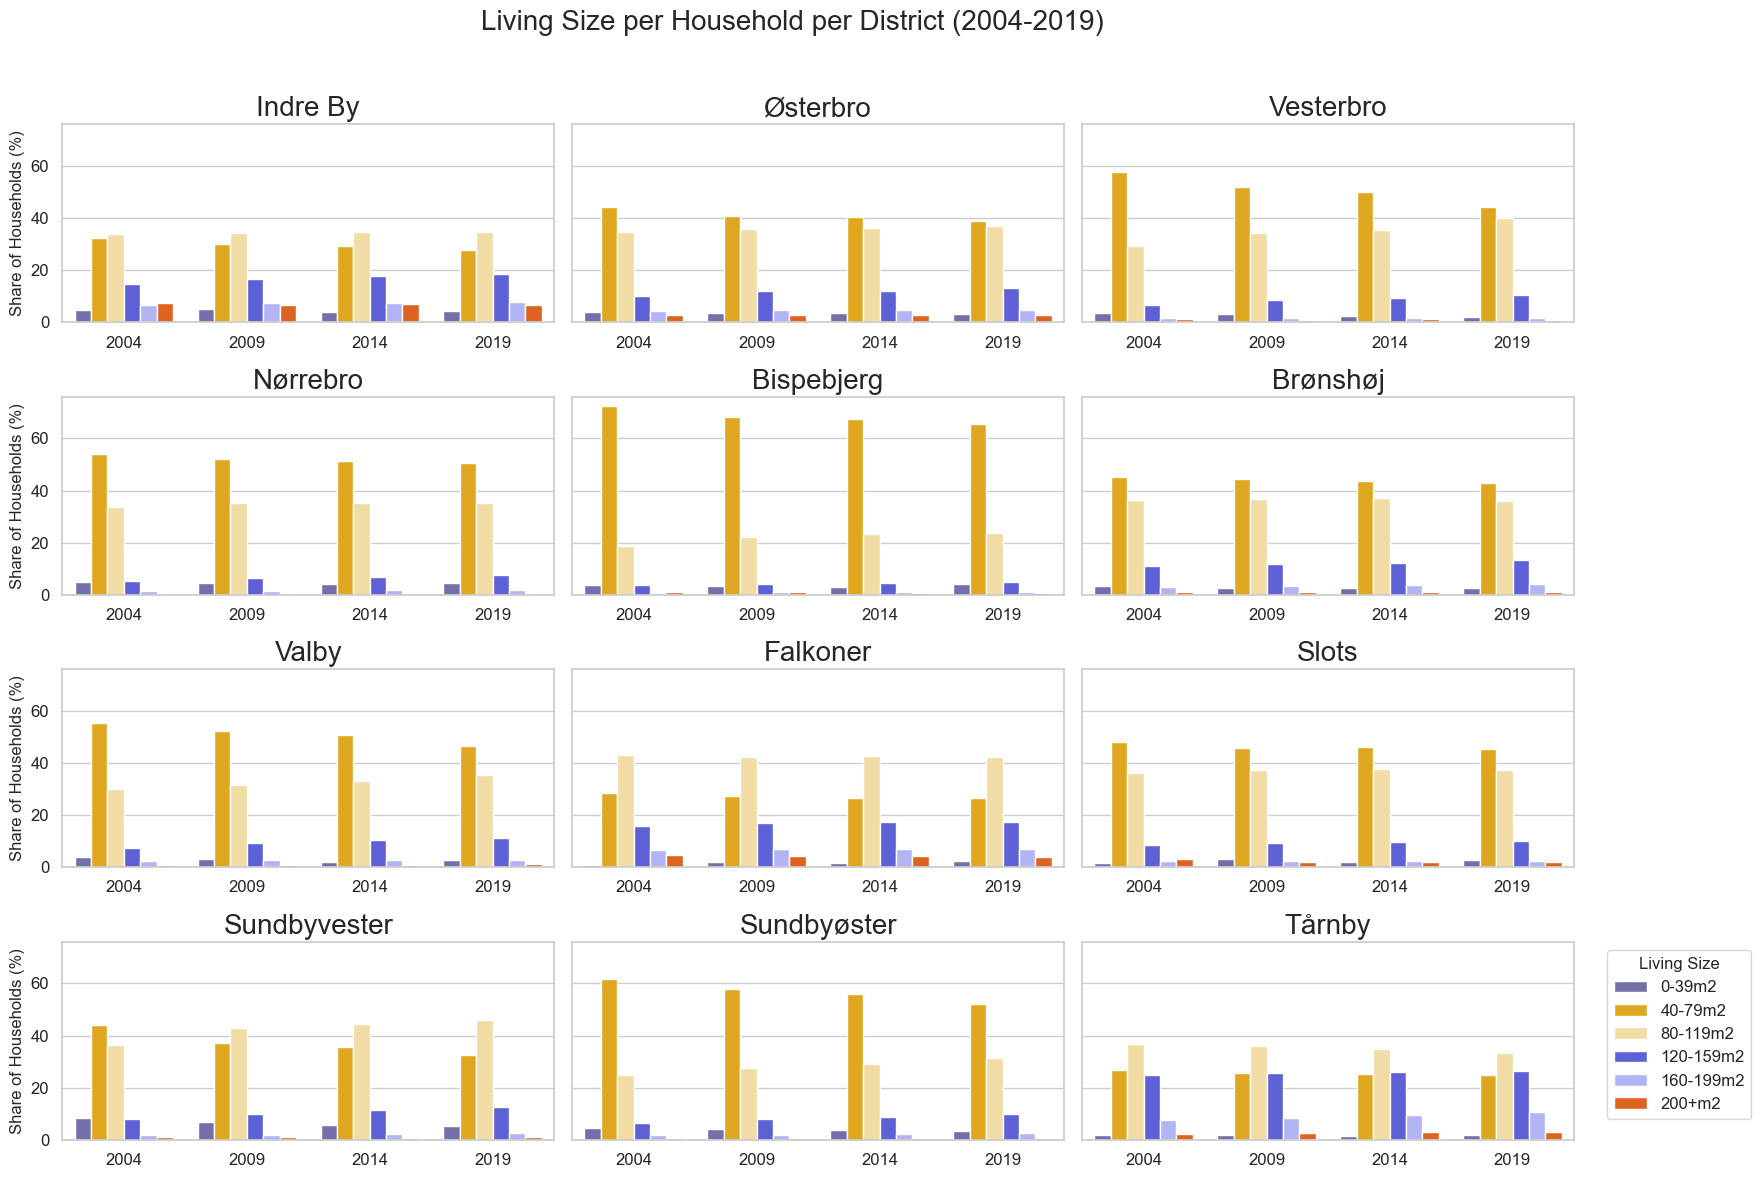

In [51]:
# This is a static, seaborn plot
df = df_house_size_long.copy()
df = df[~df['Year'].isin(['2005', '2022'])]
df['Year'] = df['Year'].replace(year_replacements)

# Drop unwanted category, report it
dropped = df[df['HouseSize'] == 'Oplystareal']['Count'].sum()
total = df['Count'].sum()
print(f"Dropped due to 'Oplystareal': {dropped:,} ({dropped / total * 100:.3f}%)")

df = df[df['HouseSize'] != 'Oplystareal'].copy()

# Define category order and map district names
house_size_order = ['0-39m2', '40-79m2', '80-119m2', '120-159m2', '160-199m2', '200+m2']
df['HouseSize'] = pd.Categorical(df['HouseSize'], categories=house_size_order, ordered=True)
df['District'] = df['KredsNr'].map(constituency_id_to_name)

# Group and normalize
df_grouped = df.groupby(['Year', 'HouseSize', 'District'], observed=True)['Count'].sum().reset_index()
totals = df_grouped.groupby(['Year', 'District'], observed=True)['Count'].sum().reset_index(name='Total')
df_grouped = df_grouped.merge(totals, on=['Year', 'District'])
df_grouped['Percentage'] = df_grouped['Count'] / df_grouped['Total'] * 100

# Plot setup
sns.set_theme(style="whitegrid", font="Arial")
palette = dict(zip(house_size_order, expanded_theme_colors[1:1+len(house_size_order)]))

districts = [d for d in const_order if d in df_grouped['District'].unique()]
fig, axes = plt.subplots(4, 3, figsize=(16, 12), sharey=True)
axes = axes.flatten()

# Plot per district
for idx, district in enumerate(districts):
    ax = axes[idx]
    df_d = df_grouped[df_grouped['District'] == district]
    sns.barplot(
        data=df_d, x='Year', y='Percentage', hue='HouseSize',
        order=sorted(df_d['Year'].unique()), hue_order=house_size_order,
        errorbar=None, palette=palette, ax=ax
    )
    ax.set_title(district, fontsize=20, fontname='Arial')
    ax.set_xlabel('')
    ax.set_ylabel('Share of Households (%)', fontsize=12)
    ax.tick_params(labelsize=12)
    ax.legend_.remove()

fig.suptitle('Living Size per Household per District (2004-2019)', fontsize=20, fontname='Arial')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.legend(title='Living Size', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12, title_fontsize=12)
plt.show()

TODO: flip the legends

This plot shows the distribution of living size, comparing district to district.  
* *Falkoner*, *Indre*, *Slots*, *Sundbyvester*, and *Tårnby* have more larger-sized living spaces.  
* *Bispebjerg*, *Brønshøj*, *Nørrebro*, *Sundbyøster*, *Vesterbro*, and *Valby* have more smaller living area-sized households.

From the previous analysis of income per household per district, we conclude that income and living size follow the same tendency, and that generally, for all districts, there are more larger households. This again supports the idea that Copenhagen might be on the way to becoming a city only for the "well-off".[8]

Notably, *Bispebjerg* has the highest relative share of 40–79m² sized households, whereas *Tårnby*, *Falkoner*, and *Indre By* have a similar size composition of households, with on average larger-sized households compared to other districts in Copenhagen. This aligns with the previous income analysis and these districts being the ones with the on-average highest income per household. However, when we look at the election analysis above for these districts, we cannot be definitive in our conclusions, as their voting patterns do not quite align.

Notice that here we have data for 2004–2019, whereas for the income data, we only have 2009–2019. This is a limitation of the data.


<a id="4"></a>
## 4. Genre


> 🎵 *A magazine style sets the tone*  
> 🎵 *With tabs and charts we’ve built and shown*  
> 🎵 *We guide the path, but not alone—*  
> 🎵 *Readers explore with clicks their own*

This section explains the choice of genre and the tools and why these exactly are useful for telling the data story.

____


**Which genre of data story did you use?**

We used and focused on the **magazine style** presented in *Segal and Heer*. This was chosen because we wanted to present and guide the reader through the information in a structured way, while still including **elements of reader interaction**. This allows the reader to take charge and potentially learn more. We include different **tabs** that we suggest an order for, along with **interactive plots**.

---

**Which tools did you use from each of the 3 categories of Visual Narrative (Figure 7, Segal and Heer)? Why?**

##### 1. Visual Structuring

- **Consistent Visual Platform**  
  We maintain the same layout throughout our website. While the main color, headers, text, and plots change between sections, the overall structure remains familiar to guide the reader.

- **"Checklist" Progress Tracker**  
  Implemented via **tabs** that help users navigate between sections. These tabs serve a similar function to a checklist, helping readers keep track of which topics they’ve explored.

##### 2. Highlighting

- **Feature Distinction**  
  We use consistent **color coding** to distinguish key demographic and election variables. Comparable variables use aligned colors to highlight differences and guide reader focus.

- **Zooming**  
  (If included) In the election progression plot over time and across districts, users can **tick different years** and **zoom in** on the map of Copenhagen to explore trends more closely.

##### 3. Transition Guidance

- We do **not** explicitly use tools from this category *on* the website.  
  However, we apply these in the **video for Assignment A**, including:
  - **Familiar Objects** (districts and animated/drawn politician figures which we also used in the video Assignment A)
  - **Animated Transitions** (zooming, sliding bars, animated text)

- Possibly, we use **Object Continuity** on the website:
  - The **same layout** across pages
  - Similar **heading visuals** (but not same plot types of course)

---

**Which tools did you use from each of the 3 categories of Narrative Structure (Figure 7, Segal and Heer)? Why?**

##### 1. Ordering

- **User-Directed Path (Somewhat)**  
  Readers can explore the story in their own order via tabs.

- **Linear Path (Mixed)**  
  We suggest a logical flow through **tab ordering** and layout.

##### 2. Interactivity

- **Hover Highlighting / Details**  
  On bar plots, readers get more information by hovering.

- **Filtering / Selection**  
  Plots allow filtering by year or variable.

- **Navigation Buttons**  
  Implemented as **tabs** for moving between sections.

- **Explicit Instruction (Somewhat)**  
  We guide users with suggestions on how to filter or which tabs to read first, while still allowing freedom.

##### 3. Messaging

- **Headlines**  
  Used in each section to introduce the topic.

- **Annotations**  
  Included directly on plots to emphasize key points.

- **Introductory Text**  
  On the homepage, accompanied by our video from Assignment A, setting the context and motivation.

- **Summary / Synthesis**
  We conclude on one district but encourage the reader to explore and draw their own conclusions from the visual tools provided. We make a short synthesis on the website.


----

<a id="5"></a>

## 5. Visualizations

The visualizations that we have chosen for the website and how they contribute to telling the story with maximal insights.


> TODO (from sune github)
> * Explain the visualizations you've chosen.
> * Why are they right for the story you want to tell?

<a id="6"></a>

## 6. Discussion

> * TODO (from sune github)
> * Think critically about your creation
> * What went well?,
> * What is still missing? What could be improved?, Why?

**Limitations**:
* Den Danske Valgbase does not measure demographics data in the precise years of the elections. Also they write the election years.
    * We also experienced that some data was missing for certain dataframes (missing years in 2007 for most socioeconomic).
    * Other dataframes we explore, certain population groups were not measured every year which makes the distribution look especially weird. E.g. for 2015 there is not measured children and pensioners in all of Copenhagen for different 'employment types'. This limited us in our analysis. 
* aggregated data; but not possible for this type of voting data. This means the types of plots that we can make is limited. I.e. We cannot see if certain groups in districts have changed voting patterns.
* folium challenge us with continous time step videos.
* Interesting data, but hard data to conclude on. Making direct conclusion is nearly impossible because it is so difficult data and there are so many factors.

<a id="7"></a>

## 7. Contributions

| Section                    | Contributor(s)              |
|----------------------------|-----------------------------|
| Motivation                 | Smilla                      |
| Basic Statistics           | Jasmin                      |
| Data Analysis: Elections   | Jasmin                      |
| Data Analysis: Demographics| Johanne & Smilla            |
| Genre                      | Johanne                     |
| Visualizations             | Smilla                      |
| Discussion                 | Smilla, Johanne, Jasmin     |


<a id="8"></a>

## 8. References

1. Den Danske Valgdatabase. (n.d.). *Valgresultater og valgdata*. Retrieved from [https://valgdatabase.dst.dk](https://valgdatabase.dst.dk)

2. Dataforsyningen. (n.d.). *Geodata for Danish Constituencies*. Retrieved from [https://dataforsyningen.dk](https://dataforsyningen.dk)

3. Danmarks Statistik. (n.d.). *Population and Income Data*. Retrieved from [https://www.dst.dk/da/Statistik/emner/oekonomi/offentlig-oekonomi/sociale-udgifter]((https://www.dst.dk/da/Statistik/emner/oekonomi/offentlig-oekonomi/sociale-udgifter))

4. Danmarks Statistik. (n.d.). *Population figures*. Retrieved from [https://www.dst.dk/en/Statistik/emner/borgere/befolkning/befolkningstal](https://www.dst.dk/en/Statistik/emner/borgere/befolkning/befolkningstal)

5. Danmarks Statistik. (n.d.). *Households and families*. Retrieved from [https://www.dst.dk/en/Statistik/emner/borgere/husstande-familier-og-boern/husstande-og-familier](https://www.dst.dk/en/Statistik/emner/borgere/husstande-familier-og-boern/husstande-og-familier)

6. Københavns Kommune. (n.d.). *Nøgletalsanalyser og statistik*. Retrieved from [https://www.kk.dk/om-kommunen/fakta-og-statistik/noegletalsanalyser](https://www.kk.dk/om-kommunen/fakta-og-statistik/noegletalsanalyser)

7. Danmarkshistorien. (2022). Folketingsvalget 2022. Retrieved from https://danmarkshistorien.lex.dk/Folketingsvalget_2022

8. AE Rådet. (2021). *Velstillede børnefamilier indtager København*. Retrieved from [https://www.ae.dk/files/dokumenter/analyse/ae_velstillede-boernefamilier-indtager-koebenhavn_0.pdf](https://www.ae.dk/files/dokumenter/analyse/ae_velstillede-boernefamilier-indtager-koebenhavn_0.pdf)

9. Syddansk Universitet. (2018). *Selv under de værste livsforhold klarer kvinder sig bedre end mænd*. Retrieved from https://www.sdu.dk/da/forskning/ebb/nyt_epi/kvinder_klarer_sig_bedre_end_maend 

10. Berlingske. (2014). *En kæmpe plan for fremtidens København er på vej. Her er fire vigtige ting, du skal vide*. Retrieved from https://www.berlingske.dk/indland/en-kaempe-plan-for-fremtidens-koebenhavn-er-paa-vej-her-er-fire-vigtige

11. Kristeligt Dagblad. (2019). *Betyder indkomsten noget for stemmeafgivningen?*. https://www.kristeligt-dagblad.dk/danmark/betyder-indkomsten-noget-stemmeafgivningen

12. Science Direct. (2021). *Income inequality and income bias in voter turnout*. https://www.sciencedirect.com/science/article/abs/pii/S0176268020301142

13. Berlingske. (2025). *Detaljeret kort: Se, hvad folk tjener i dit nabolag*. https://www.berlingske.dk/vores-liv/detaljeret-kort-se-hvad-folk-tjener-i-dit-nabolag

14. Realkredit Danmark. (2013). *Danskernes boligpris i bedre match med indkomsten*. https://www.rd.dk/PDF/Om%20os/Analyser/2013/Danskernes-boligpris-i-bedre-match-med-indkomsten.pdf?utm_source=chatgpt.com